# OSE Dataset Visualization

This notebook provides visualizations and examples for each of the 9 extracted datasets from the OSE project.

Each dataset has been categorized and includes index columns (`company_name`, `siren`, `siret`) for easy joining and reference.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set path to datasets
DATA_DIR = Path('../src/ose_core/data_ingestion/extracted_datasets')

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Company Basic Info

This dataset contains basic company identification and information including:
- Company names and variations
- SIREN and SIRET identifiers
- Department codes
- Activity descriptions
- Processing timestamps

**Use case:** Primary reference dataset for company identification.


In [2]:
# Load company basic info
df_basic = pd.read_csv(DATA_DIR / '01_company_basic_info.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_basic.shape}")
print(f"\nColumns: {list(df_basic.columns)}")
display(df_basic.head(10))


Dataset shape: (375, 10)

Columns: ['company_name', 'siren', 'siret', 'departement', 'resume_activite', 'raison_sociale_keyword', 'raison_sociale', 'last_modified', 'processedAt', 'updatedAt']


,company_name,siren,siret,departement,resume_activite,raison_sociale_keyword,raison_sociale,last_modified,processedAt,updatedAt
0,PROCONI,000132066,NaN,00,fabrication de plats cuisinés frais pour la gr...,PROCONI,PROCONI,2023-04-07T20:37:50,1763018431,1762042439
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,21,Spécialisée en pains d'épices et pâtisseries a...,PAIN D'EPICES MULOT ET PETITJEAN,PAIN D'EPICES MULOT ET PETITJEAN,2025-05-05T07:44:39,1761068226,1763052487
2,JULIEN MACK,016450298,01645029800043,92,Préparation industrielle de produits à base de...,JULIEN MACK,JULIEN MACK,2025-06-27T08:59:06,1761097489,1763052488
3,OROC BAT,046580031,04658003100022,64,"fabrication de conserves, charcuterie et jambo...",OROC BAT,OROC BAT,2025-05-05T04:38:43,1763401032,1763052541
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,38,fabrication de farines,MINOTERIE DU TRIEVES CORREARD ET FILS,MINOTERIE DU TRIEVES CORREARD ET FILS,2025-06-27T15:52:42,1763438582,1763943214
5,MAISON CANTINI FLANDIN,057821266,05782126600095,13,Fabrication transformation achat et vente de t...,MAISON CANTINI FLANDIN,MAISON CANTINI FLANDIN,2025-05-05T05:54:55,1761105532,1763052557
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,45,fabricant de volailles et produits transformés...,AUVRAY-AUXY EN GATINAIS,AUVRAY-AUXY EN GATINAIS,2025-05-27T08:34:13,1761118573,1763052587
7,BIRABEN,096780838,09678083800015,64,fabrication de plats préparés,BIRABEN,BIRABEN,2025-05-05T08:04:16,1762592602,1763052593
8,LAITERIE DE MAYOTTE,099378564,09937856400019,976,fabrication de lait liquide et de produits lai...,LAITERIE DE MAYOTTE,LAITERIE DE MAYOTTE,2025-09-25T02:24:42,1760928797,1763052595
9,SALAISONS CHAMBADE,300700119,30070011900039,71,"fabricant de produits à base de viande, charcu...",SALAISONS CHAMBADE,SALAISONS CHAMBADE,2025-05-20T18:28:55,1760538135,1763052889


In [3]:
# Summary statistics
print(f"\nSummary:")
print(f"- Total companies: {len(df_basic)}")
print(f"- Companies with SIRET: {df_basic['siret'].notna().sum()} ({df_basic['siret'].notna().sum()/len(df_basic)*100:.1f}%)")
print(f"- Companies with SIREN: {df_basic['siren'].notna().sum()} ({df_basic['siren'].notna().sum()/len(df_basic)*100:.1f}%)")

print(f"- Unique departments: {df_basic['departement'].nunique()}")
print(f"- Companies with activity description: {df_basic['resume_activite'].notna().sum()}")


Summary:
- Total companies: 375
- Companies with SIRET: 351 (93.6%)
- Companies with SIREN: 375 (100.0%)
- Unique departments: 87
- Companies with activity description: 374


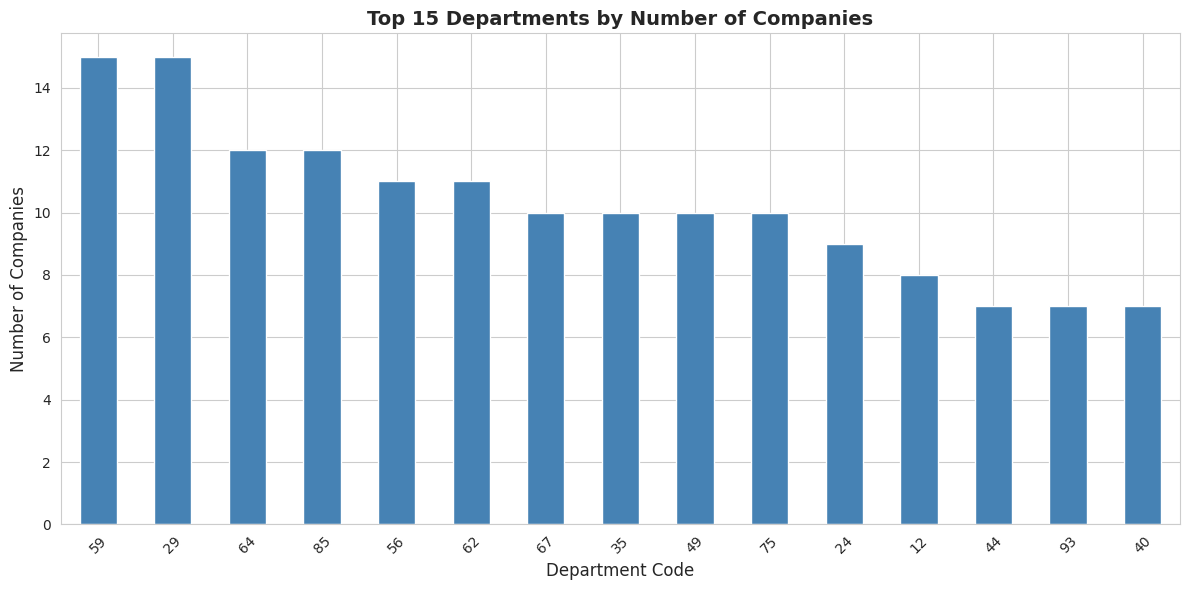


Top 5 departments:
departement
59    15
29    15
64    12
85    12
56    11
Name: count, dtype: int64


In [4]:
# Visualize department distribution
if df_basic['departement'].notna().any():
    dept_counts = df_basic['departement'].value_counts().head(15) # select top number of departement

    plt.figure(figsize=(12, 6))
    dept_counts.plot(kind='bar', color='steelblue')
    plt.title('Top 15 Departments by Number of Companies', fontsize=14, fontweight='bold')
    plt.xlabel('Department Code', fontsize=12)
    plt.ylabel('Number of Companies', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nTop 5 departments:")
    print(dept_counts.head())


## 2. Financial Data

This dataset contains financial metrics including:
- Consolidated revenue (`caConsolide`)
- Group revenue (`caGroupe`)
- Operating results (`resultatExploitation`)
- Yearly KPI financial metrics (2014-2025)

**Use case:** Financial analysis, revenue trends, profitability assessment.


In [5]:
# Load financial data
df_financial = pd.read_csv(DATA_DIR / '02_financial_data.csv', dtype={'siren': str, 'siret': str})
print(f" Original Shape:{df_financial.shape}")
df_financial.head(10)

 Original Shape:(375, 112)


,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
0,PROCONI,000132066,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,0.0,0.0,76546.0,0.0,120000.0,1.0772,6729652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JULIEN MACK,016450298,01645029800043,0.0,0.0,670860.0,0.0,257600.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OROC BAT,046580031,04658003100022,0.0,0.0,140333.0,0.0,350000.0,NaN,5028967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,0.0,0.0,473736.0,0.0,3000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MAISON CANTINI FLANDIN,057821266,05782126600095,0.0,0.0,52265.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BIRABEN,096780838,09678083800015,0.0,0.0,-64962.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LAITERIE DE MAYOTTE,099378564,09937856400019,NaN,NaN,1588313.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,30070011900039,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_financial.tail(20)

,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
355,MARTIN DOW HEALTHCARE,811831163,81183116300027,0.0,0.0,-2146867.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,EPISENS BY INVIVO,818893281,81889328100019,NaN,NaN,-1513406.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,VAYGA SAS,820918407,82091840700025,0.0,0.0,128274.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,TROPICANA,828787291,82878729100164,0.0,0.0,-60636.0,0.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,DIABOLO,829983600,82998360000018,0.0,0.0,387667.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,EVS DECOUPE,838412625,NaN,NaN,NaN,NaN,NaN,20000.0,1.104587,5118566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,SOCIETE DES VOLAILLES DE PLOURAY,840071310,84007131000014,0.0,0.0,-80276.0,0.0,1500000.0,1.282221,8588960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,AUVERGNE BOULANGERE ET PATISSIERE,861200210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,DISTRIPORC SARL,871201190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,MAISON COSSARD S.A.S,872800651,87280065100012,0.0,0.0,979188.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f"Dataset shape: {df_financial.shape}")
print(f"\nMain financial columns:")
df_financial.describe()


Dataset shape: (375, 112)

Main financial columns:


,caConsolide,caGroupe,resultatExploitation,dateConsolide,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,kpi_2023_ca_bilan,kpi_2023_resultat_exploitation,kpi_2023_capital_social,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
count,2.980000e+02,2.980000e+02,3.410000e+02,298.000000,1.440000e+02,63.000000,6.800000e+01,1.300000e+02,7.700000e+01,1.120000e+02,...,3.000000e+00,3.000000e+00,3.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,2.000000e+00
mean,3.463423e+06,3.463423e+06,-3.985202e+04,33.885906,1.012406e+06,1.041426,6.704693e+06,7.243178e+06,-1.153025e+06,1.032037e+06,...,4.034308e+07,3.848485e+07,-1.800600e+06,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,-3.126124e+06
std,3.425345e+07,3.425345e+07,3.262056e+06,259.835173,2.880513e+06,0.169791,1.839649e+06,1.428802e+06,7.665439e+06,3.098742e+06,...,4.384956e+07,4.230342e+07,4.998328e+06,NaN,NaN,NaN,NaN,NaN,NaN,5.861739e+06
min,0.000000e+00,0.000000e+00,-5.829714e+07,0.000000,1.000000e+03,0.553973,1.370627e+06,4.782409e+06,-5.829714e+07,8.000000e+03,...,1.700000e+05,1.370000e+05,-7.570000e+06,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,-7.271000e+06
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.197750e+05,0.985812,5.709116e+06,6.111189e+06,-4.132690e+05,1.374230e+05,...,1.695462e+07,1.579578e+07,-3.311500e+06,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,-5.198562e+06
50%,0.000000e+00,0.000000e+00,1.276470e+05,0.000000,3.100000e+05,1.054204,6.609048e+06,7.009743e+06,1.021050e+05,3.564715e+05,...,3.373924e+07,3.145456e+07,9.470000e+05,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,-3.126124e+06
75%,0.000000e+00,0.000000e+00,4.367600e+05,0.000000,6.623222e+05,1.096136,7.954055e+06,8.225256e+06,3.419530e+05,6.911318e+05,...,6.042962e+07,5.765878e+07,1.084100e+06,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,-1.053687e+06
max,5.000000e+08,5.000000e+08,2.257302e+06,2021.000000,2.900000e+07,1.792549,1.252457e+07,1.252457e+07,2.257302e+06,2.900000e+07,...,8.712000e+07,8.386300e+07,1.221201e+06,76128872.0,-2553855.0,68850584.0,-113766.0,54327316.0,2235203.0,1.018751e+06


In [8]:
#SELECTING COLUMN
index_cols = ['company_name', 'siren', 'siret']
main_cols = ['caConsolide', 'caGroupe', 'resultatExploitation','dateConsolide']
display(df_financial[index_cols+main_cols].head(10))

,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide
0,PROCONI,000132066,NaN,0.0,0.0,0.0,0.0
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,0.0,0.0,76546.0,0.0
2,JULIEN MACK,016450298,01645029800043,0.0,0.0,670860.0,0.0
3,OROC BAT,046580031,04658003100022,0.0,0.0,140333.0,0.0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,0.0,0.0,473736.0,0.0
5,MAISON CANTINI FLANDIN,057821266,05782126600095,0.0,0.0,52265.0,0.0
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,0.0,0.0,0.0,0.0
7,BIRABEN,096780838,09678083800015,0.0,0.0,-64962.0,0.0
8,LAITERIE DE MAYOTTE,099378564,09937856400019,NaN,NaN,1588313.0,NaN
9,SALAISONS CHAMBADE,300700119,30070011900039,0.0,0.0,0.0,0.0


In [9]:
# Filter out zeros and negative values for better visualization
ca_consolide = df_financial['caConsolide'].replace(0, np.nan).dropna()
ca_groupe = df_financial['caGroupe'].replace(0, np.nan).dropna()

In [10]:
print(f"Ca_consolide:\n{ca_consolide.head()}")
print(f"Ca_groupe:\n{ca_groupe.head()}")

Ca_consolide:
79     15000000.0
132    15000000.0
134    19600000.0
177    20000000.0
250    12000000.0
Name: caConsolide, dtype: float64
Ca_groupe:
79     15000000.0
132    15000000.0
134    19600000.0
177    20000000.0
250    12000000.0
Name: caGroupe, dtype: float64


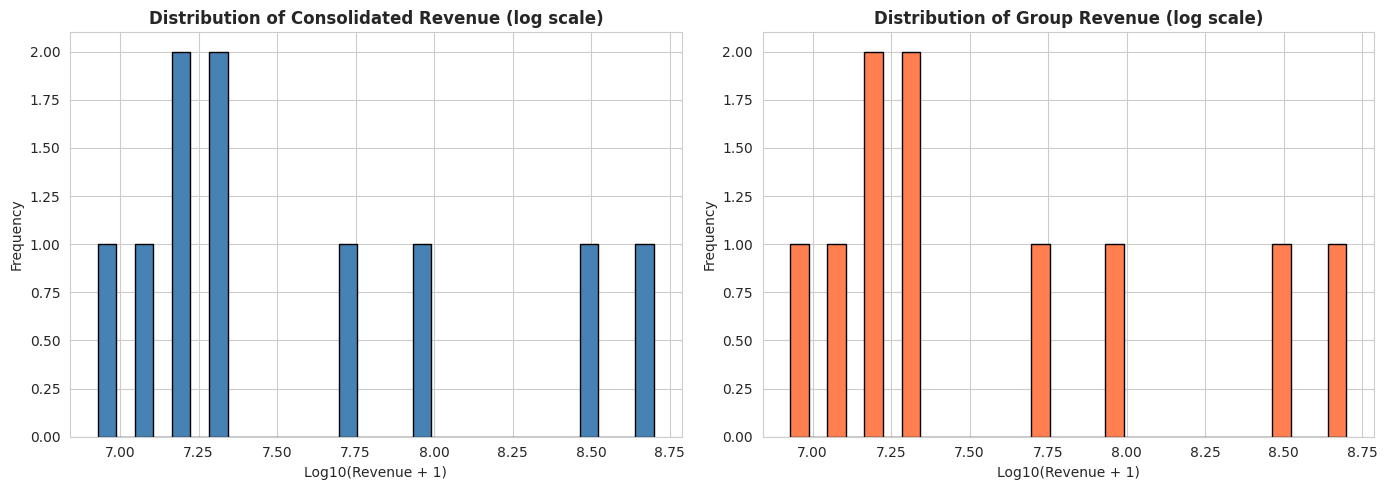

In [11]:
# Visualize financial metrics distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


if len(ca_consolide) > 0:
    axes[0].hist(np.log10(ca_consolide + 1), bins=30, color='steelblue', edgecolor='black')
    axes[0].set_title('Distribution of Consolidated Revenue (log scale)', fontweight='bold')
    axes[0].set_xlabel('Log10(Revenue + 1)')
    axes[0].set_ylabel('Frequency')

if len(ca_groupe) > 0:
    axes[1].hist(np.log10(ca_groupe + 1), bins=30, color='coral', edgecolor='black')
    axes[1].set_title('Distribution of Group Revenue (log scale)', fontweight='bold')
    axes[1].set_xlabel('Log10(Revenue + 1)')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
# Summary statistics
print("\nFinancial Summary:")
print(f"Companies with consolidated revenue data: {ca_consolide.notna().sum()}")
print(f"Companies with group revenue data: {ca_groupe.notna().sum()}")

if len(ca_consolide) > 0:
    print(f"\nConsolidated Revenue:")
    print(f"  Mean: {ca_consolide.mean():,.0f}")
    print(f"  Median: {ca_consolide.median():,.0f}")
    print(f"  Max: {ca_consolide.max():,.0f}")


Financial Summary:
Companies with consolidated revenue data: 10
Companies with group revenue data: 10

Consolidated Revenue:
  Mean: 103,210,000
  Median: 19,800,000
  Max: 500,000,000


In [13]:
# Create a copy of financial dataframe with only KPI columns
# Drop main financial columns, keeping index columns and KPI columns
df_kpi = df_financial.drop(columns=main_cols).copy()
df_kpi.head(10)

,company_name,siren,siret,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,kpi_2023_ca_bilan,kpi_2023_resultat_exploitation,kpi_2023_capital_social,kpi_2023_resultat_bilan,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
0,PROCONI,000132066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,120000.0,1.0772,6729652.0,6729652.0,76546.0,120000.0,660408.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JULIEN MACK,016450298,01645029800043,257600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OROC BAT,046580031,04658003100022,350000.0,NaN,5028967.0,5062444.0,140333.0,350000.0,209105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MAISON CANTINI FLANDIN,057821266,05782126600095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BIRABEN,096780838,09678083800015,NaN,NaN,NaN,7035151.0,NaN,NaN,139951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LAITERIE DE MAYOTTE,099378564,09937856400019,NaN,NaN,NaN,7949654.0,NaN,NaN,1006387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,30070011900039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_kpi.head()

,company_name,siren,siret,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,kpi_2023_ca_bilan,kpi_2023_resultat_exploitation,kpi_2023_capital_social,kpi_2023_resultat_bilan,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
0,PROCONI,000132066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,120000.0,1.0772,6729652.0,6729652.0,76546.0,120000.0,660408.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JULIEN MACK,016450298,01645029800043,257600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OROC BAT,046580031,04658003100022,350000.0,NaN,5028967.0,5062444.0,140333.0,350000.0,209105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
col_2011 = [x for x in df_financial.columns if '2011' in x]


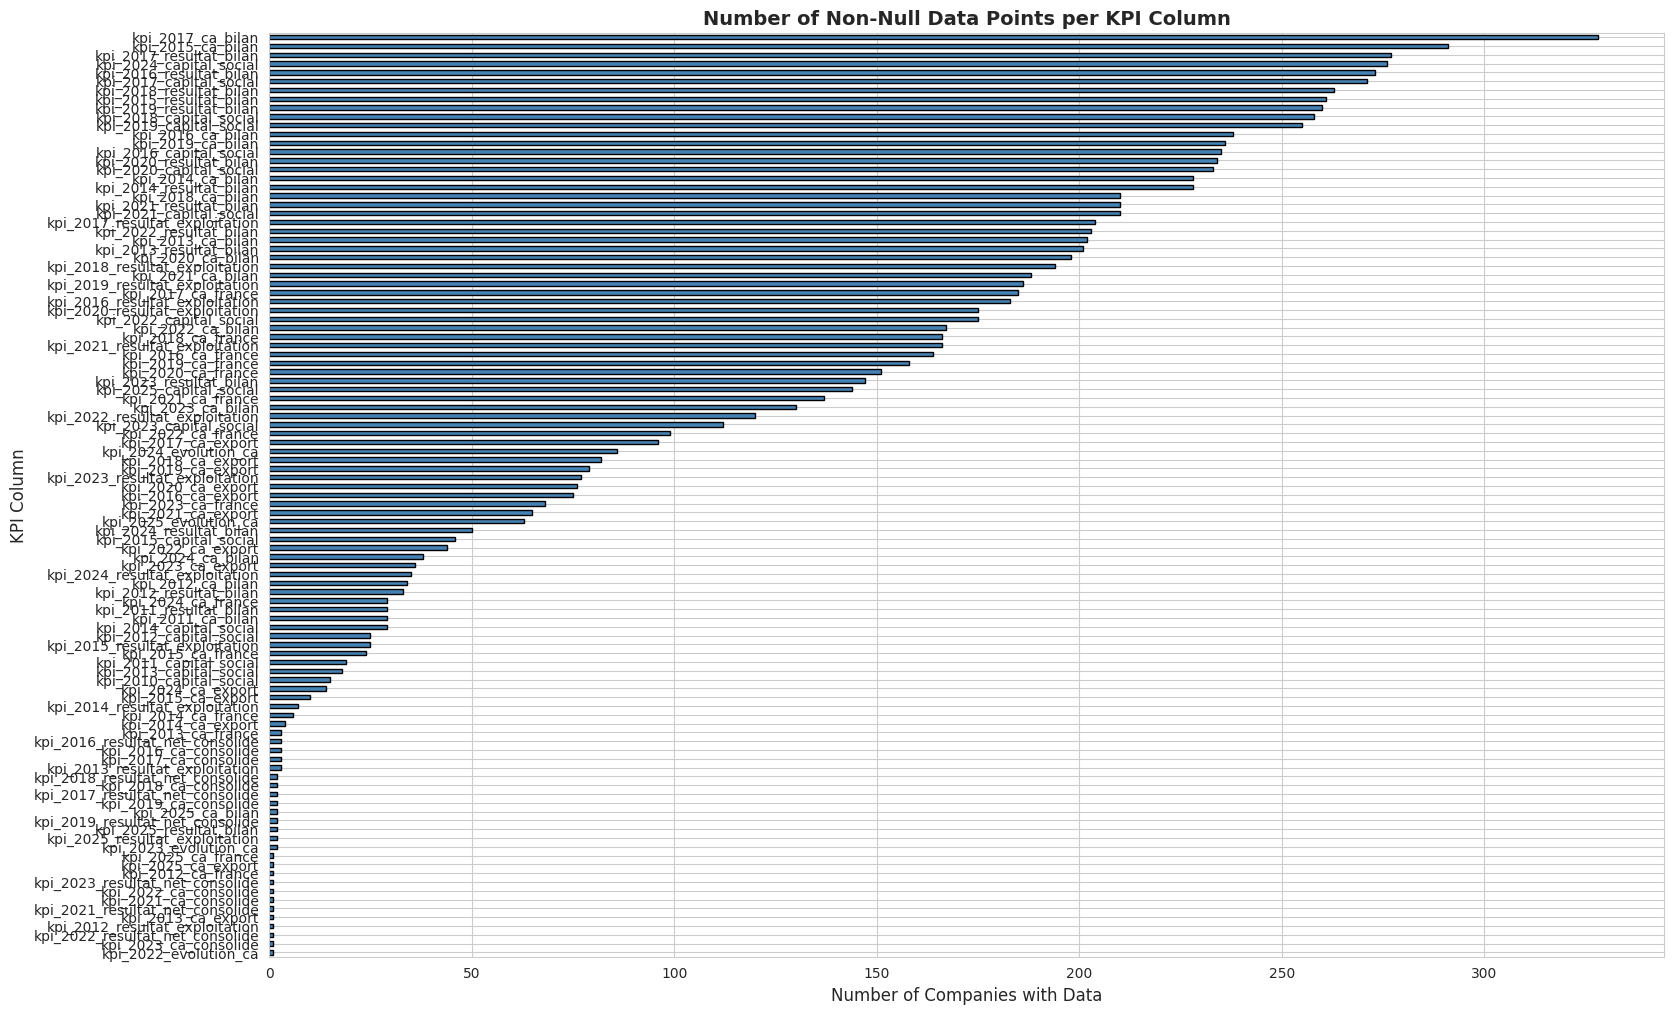

In [16]:
# Plot the number of non-null data points in each KPI column
kpi_data_counts = df_kpi.drop(columns=index_cols).notna().sum().sort_values(ascending=True)

plt.figure(figsize=(18, 12))
kpi_data_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Number of Non-Null Data Points per KPI Column', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies with Data', fontsize=12)
plt.ylabel('KPI Column', fontsize=12)
# plt.tight_layout()
plt.show()


In [17]:
#Summary statistics of KPI data coverage
print(f"\nKPI Data Coverage Summary:")
print(f"Total KPI columns: {len(kpi_data_counts)}")
print(f"Columns with data: {(kpi_data_counts > 0).sum()}")
print(f"Columns with full data: {(kpi_data_counts == len(df_kpi)).sum()}")
print(f"\nFLOP 10 KPI columns by data coverage:")
print(kpi_data_counts.head(10))
print(f"\nTOP 10 KPI columns by data coverage:")
print(kpi_data_counts.tail(20))


KPI Data Coverage Summary:
Total KPI columns: 105
Columns with data: 105
Columns with full data: 0

FLOP 10 KPI columns by data coverage:
kpi_2022_evolution_ca              1
kpi_2023_ca_consolide              1
kpi_2022_resultat_net_consolide    1
kpi_2012_resultat_exploitation     1
kpi_2013_ca_export                 1
kpi_2021_resultat_net_consolide    1
kpi_2021_ca_consolide              1
kpi_2022_ca_consolide              1
kpi_2023_resultat_net_consolide    1
kpi_2012_ca_france                 1
dtype: int64

TOP 10 KPI columns by data coverage:
kpi_2021_resultat_bilan    210
kpi_2018_ca_bilan          210
kpi_2014_resultat_bilan    228
kpi_2014_ca_bilan          228
kpi_2020_capital_social    233
kpi_2020_resultat_bilan    234
kpi_2016_capital_social    235
kpi_2019_ca_bilan          236
kpi_2016_ca_bilan          238
kpi_2019_capital_social    255
kpi_2018_capital_social    258
kpi_2019_resultat_bilan    260
kpi_2015_resultat_bilan    261
kpi_2018_resultat_bilan    263
kpi_20

## 3. Workforce Data

This dataset contains employee and workforce information:
- `effectif`: Workforce
- `effectifConsolide`: Consolidated workforce
- `effectifEstime`: Estimated workforce
- `effectifGroupe`: Group workforce

**Use case:** Company size analysis, workforce trends, employee count comparisons.


In [18]:
# Load workforce data
df_workforce = pd.read_csv(DATA_DIR / '03_workforce_data.csv', dtype={'siren': str, 'siret': str})
df_workforce.head(20)

,company_name,siren,siret,effectif,effectifConsolide,effectifEstime,effectifGroupe
0,PROCONI,000132066,NaN,0.0,0.0,75.0,0.0
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,35.0,0.0,0.0,0.0
2,JULIEN MACK,016450298,01645029800043,35.0,0.0,0.0,0.0
3,OROC BAT,046580031,04658003100022,21.0,0.0,0.0,0.0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,23.0,0.0,30.0,0.0
5,MAISON CANTINI FLANDIN,057821266,05782126600095,35.0,0.0,0.0,0.0
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,35.0,0.0,0.0,0.0
7,BIRABEN,096780838,09678083800015,35.0,0.0,40.0,0.0
8,LAITERIE DE MAYOTTE,099378564,09937856400019,46.0,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,30070011900039,35.0,0.0,0.0,0.0


In [19]:
# Summary
print(f"Dataset shape: {df_workforce.shape}")
print(f"\nColumns: {list(df_workforce.columns)}")


print(f"\nWorkforce Summary:")
for col in ['effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']:
    non_zero = (df_workforce[col] > 0).sum()
    if non_zero > 0:
        mean_val = df_workforce[df_workforce[col] > 0][col].mean()
        print(f"{col}: {non_zero} companies with data, mean: {mean_val:.1f}")

Dataset shape: (375, 7)

Columns: ['company_name', 'siren', 'siret', 'effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']

Workforce Summary:
effectif: 351 companies with data, mean: 48.4
effectifConsolide: 10 companies with data, mean: 397.4
effectifEstime: 112 companies with data, mean: 52.8
effectifGroupe: 10 companies with data, mean: 397.4


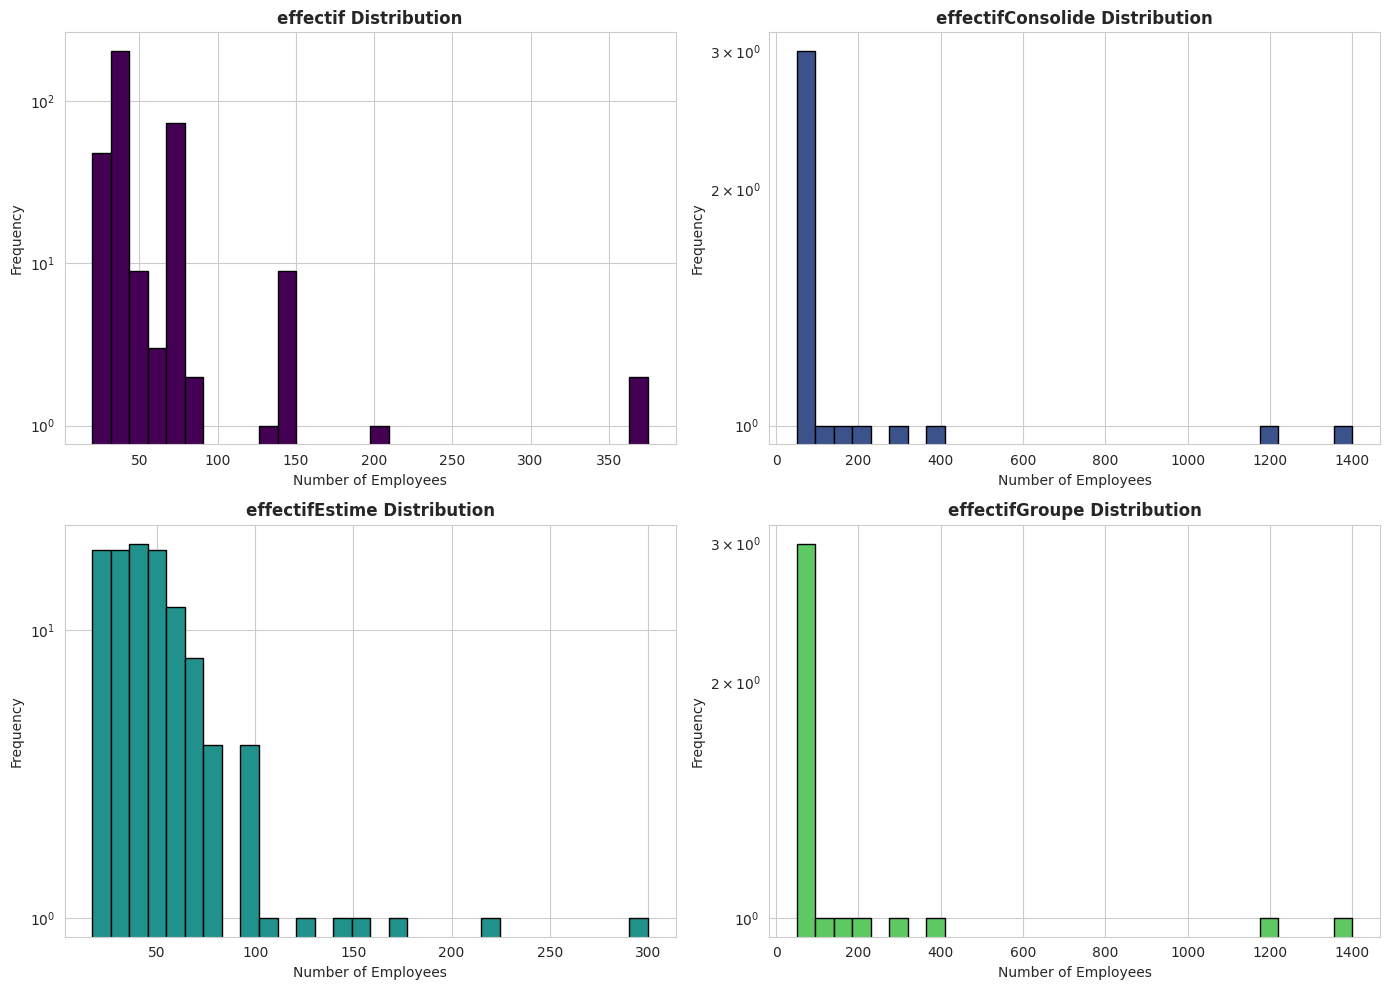

In [20]:
# Visualize workforce distribution
workforce_cols = ['effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(workforce_cols):
    data = df_workforce[df_workforce[col] > 0][col]
    if len(data) > 0:
        axes[idx].hist(data, bins=30, color=plt.cm.viridis(idx/len(workforce_cols)), edgecolor='black')
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_xlabel('Number of Employees')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_yscale('log')

plt.tight_layout()
plt.show()


## 4. Company Structure

This dataset contains organizational structure information:
- Number of direct subsidiaries
- Number of secondary establishments
- Number of brands
- Group ownership flags

**Use case:** Understanding company complexity, group structures, organizational analysis.


In [21]:
# Load company structure data
df_structure = pd.read_csv(DATA_DIR / '04_company_structure.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_structure.shape}")
display(df_structure.head(10))


Dataset shape: (375, 9)


,company_name,siren,siret,nbFilialesDirectes,nbEtabSecondaire,nbMarques,hasGroupOwner,appartient_groupe,nombre_etablissements_secondaires_inactifs
0,PROCONI,000132066,NaN,0.0,0.0,0.0,False,False,0
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,6.0,4.0,14.0,False,False,3
2,JULIEN MACK,016450298,01645029800043,1.0,0.0,4.0,False,False,2
3,OROC BAT,046580031,04658003100022,0.0,0.0,3.0,False,False,0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,0.0,0.0,0.0,False,False,0
5,MAISON CANTINI FLANDIN,057821266,05782126600095,0.0,0.0,0.0,False,False,4
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,0.0,0.0,0.0,False,False,0
7,BIRABEN,096780838,09678083800015,0.0,0.0,0.0,False,False,0
8,LAITERIE DE MAYOTTE,099378564,09937856400019,NaN,NaN,NaN,False,False,0
9,SALAISONS CHAMBADE,300700119,30070011900039,0.0,0.0,0.0,False,False,2


In [22]:
# Summary
print(f"\nStructure Summary:")
print(f"Companies with subsidiaries: {(df_structure['nbFilialesDirectes'] > 0).sum()}")
print(f"Companies with secondary establishments: {(df_structure['nbEtabSecondaire'] > 0).sum()}")
print(f"Companies with brands: {(df_structure['nbMarques'] > 0).sum()}")
print(f"Companies with group owner: {df_structure['hasGroupOwner'].sum()}")
print(f"Companies belonging to group: {df_structure['appartient_groupe'].sum()}")


Structure Summary:
Companies with subsidiaries: 15
Companies with secondary establishments: 86
Companies with brands: 111
Companies with group owner: 44
Companies belonging to group: 49


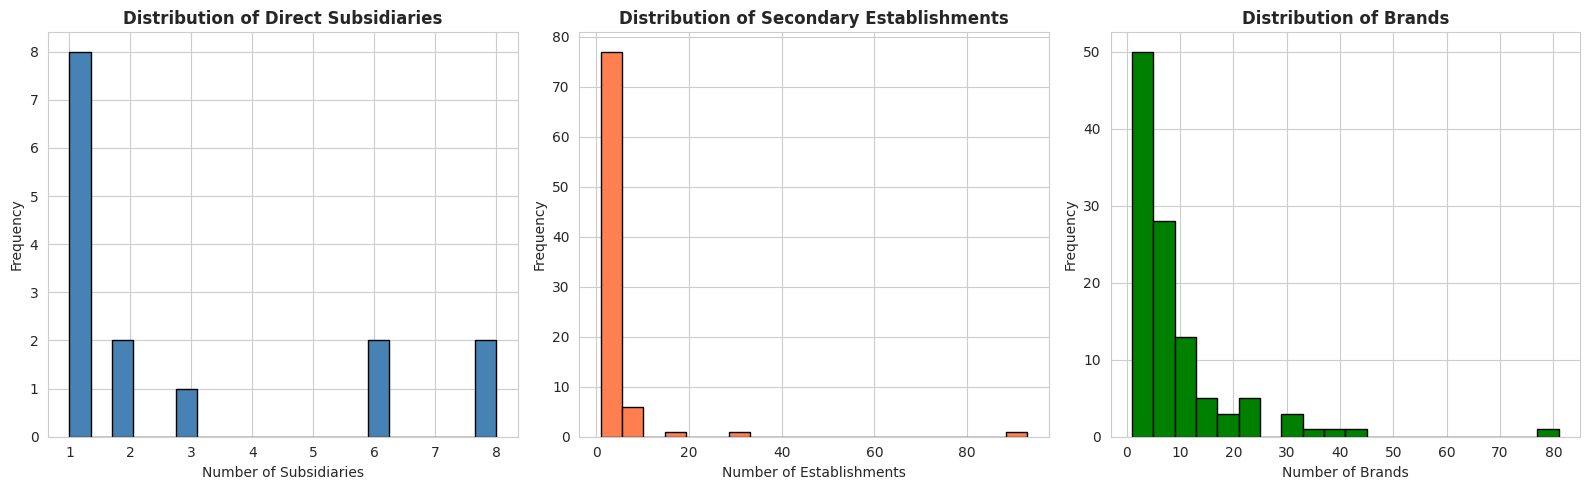

In [23]:
# Visualize company structure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Subsidiaries
subs_data = df_structure[df_structure['nbFilialesDirectes'] > 0]['nbFilialesDirectes']
if len(subs_data) > 0:
    axes[0].hist(subs_data, bins=20, color='steelblue', edgecolor='black')
    axes[0].set_title('Distribution of Direct Subsidiaries', fontweight='bold')
    axes[0].set_xlabel('Number of Subsidiaries')
    axes[0].set_ylabel('Frequency')

# Secondary establishments
etab_data = df_structure[df_structure['nbEtabSecondaire'] > 0]['nbEtabSecondaire']
if len(etab_data) > 0:
    axes[1].hist(etab_data, bins=20, color='coral', edgecolor='black')
    axes[1].set_title('Distribution of Secondary Establishments', fontweight='bold')
    axes[1].set_xlabel('Number of Establishments')
    axes[1].set_ylabel('Frequency')

# Brands
brands_data = df_structure[df_structure['nbMarques'] > 0]['nbMarques']
if len(brands_data) > 0:
    axes[2].hist(brands_data, bins=20, color='green', edgecolor='black')
    axes[2].set_title('Distribution of Brands', fontweight='bold')
    axes[2].set_xlabel('Number of Brands')
    axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. Classification Flags

This dataset contains company classification and type flags:
- Startup, B2B, B2C flags
- Fintech, CAC40 flags
- Family business indicators
- Company type classifications

**Use case:** Company segmentation, filtering, classification analysis.


In [24]:
# Load classification flags
df_flags = pd.read_csv(DATA_DIR / '05_classification_flags.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_flags.shape}")
display(df_flags.head(10))


Dataset shape: (375, 15)


,company_name,siren,siret,startup,radiee,entreprise_b2b,entreprise_b2c,fintech,cac40,entreprise_familiale,entreprise_familiale_ter,filtre_levee_fond,flag_type_entreprise,hasMarques,hasESV1Contacts
0,PROCONI,000132066,NaN,False,False,False,False,False,False,False,undefined,False,['secteur_industriel'],False,False
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,False,False,True,False,False,False,True,true,False,"['entreprise_familiale', 'entreprise_b2b', 'fi...",True,True
2,JULIEN MACK,016450298,01645029800043,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",True,False
3,OROC BAT,046580031,04658003100022,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'site_ecommerce', 'activite...",True,False
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",False,False
5,MAISON CANTINI FLANDIN,057821266,05782126600095,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'site_ecommerce', 'secteur_...",False,False
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,False,False,True,False,False,False,False,false,False,"['entreprise_b2b', 'site_ecommerce', 'activite...",False,False
7,BIRABEN,096780838,09678083800015,False,False,True,False,False,False,True,true,False,"['entreprise_familiale', 'entreprise_b2b', 'si...",False,False
8,LAITERIE DE MAYOTTE,099378564,09937856400019,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",False,True
9,SALAISONS CHAMBADE,300700119,30070011900039,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'secteur_industriel', 'cara...",False,False


In [25]:
# Count flags
print(f"\nFlag Counts:")
boolean_cols = ['startup', 'radiee', 'entreprise_b2b', 'entreprise_b2c', 'fintech', 'cac40',
                'entreprise_familiale', 'filtre_levee_fond', 'hasMarques', 'hasESV1Contacts', 'hasGroupOwner']
for col in boolean_cols:
    if col in df_flags.columns:
        count = df_flags[col].sum() if df_flags[col].dtype == bool else (df_flags[col] == True).sum()
        print(f"{col}: {count} companies ({count/len(df_flags)*100:.1f}%)")


Flag Counts:
startup: 0 companies (0.0%)
radiee: 0 companies (0.0%)
entreprise_b2b: 368 companies (98.1%)
entreprise_b2c: 12 companies (3.2%)
fintech: 0 companies (0.0%)
cac40: 0 companies (0.0%)
entreprise_familiale: 30 companies (8.0%)
filtre_levee_fond: 0 companies (0.0%)
hasMarques: 111 companies (29.6%)
hasESV1Contacts: 75 companies (20.0%)


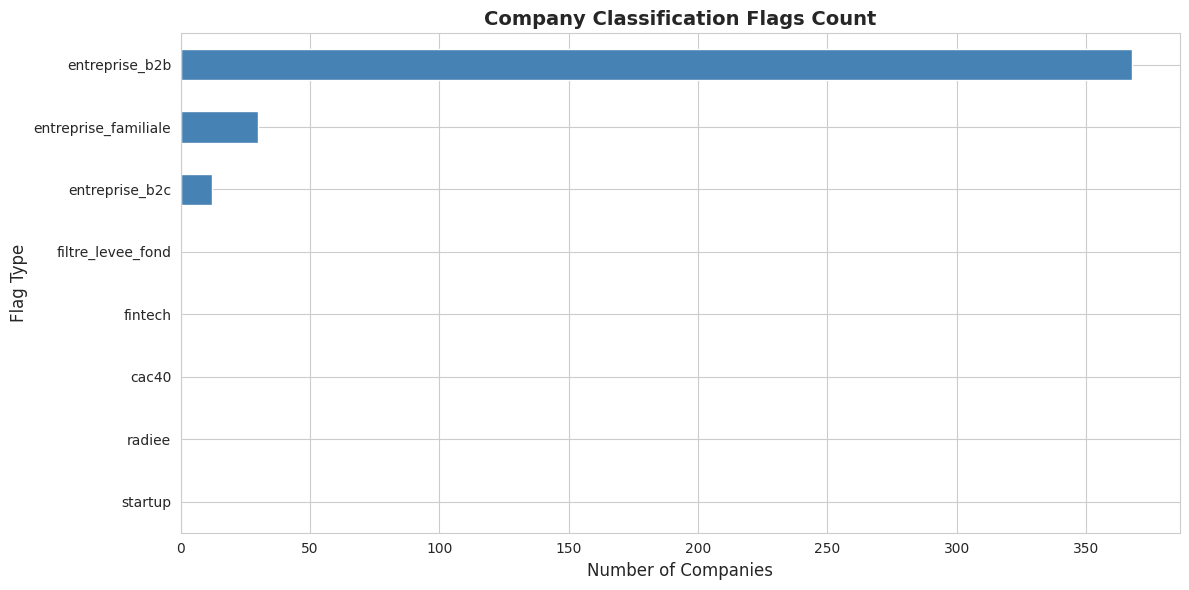

In [26]:
# Visualize classification flags
boolean_cols = ['startup', 'radiee', 'entreprise_b2b', 'entreprise_b2c', 'fintech', 'cac40',
                'entreprise_familiale', 'filtre_levee_fond']

flag_counts = {}
for col in boolean_cols:
    if col in df_flags.columns:
        count = df_flags[col].sum() if df_flags[col].dtype == bool else (df_flags[col] == True).sum()
        flag_counts[col] = count

if flag_counts:
    plt.figure(figsize=(12, 6))
    flags_df = pd.Series(flag_counts).sort_values(ascending=True)
    flags_df.plot(kind='barh', color='steelblue')
    plt.title('Company Classification Flags Count', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Companies', fontsize=12)
    plt.ylabel('Flag Type', fontsize=12)
    plt.tight_layout()
    plt.show()


## 6. Contact Metrics

This dataset contains contact information metrics:
- Number of email contacts
- Number of LinkedIn URLs
- Professional and personal contact counts
- Contact quality metrics

**Use case:** Contact availability analysis, lead generation potential, contact quality assessment.


In [27]:
# Load contact metrics
df_contacts = pd.read_csv(DATA_DIR / '06_contact_metrics.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_contacts.shape}")
display(df_contacts.head(10))


Dataset shape: (375, 9)


,company_name,siren,siret,nombre_societeinfo_contact_email,nombre_societeinfo_contact_linkedin_url,nombre_societeinfo_contact_pro,nombre_societeinfo_contact_perso,nombre_societeinfo_contact_max2,nombre_societeinfo_contact_max5
0,PROCONI,000132066,NaN,0,0,0,0,0,0
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,6,6,14,0,2,5
2,JULIEN MACK,016450298,01645029800043,11,11,0,16,2,5
3,OROC BAT,046580031,04658003100022,8,8,1,9,2,5
4,MINOTERIE DU TRIEVES CORREARD ET FILS,057504649,05750464900013,0,0,0,14,2,5
5,MAISON CANTINI FLANDIN,057821266,05782126600095,1,1,0,4,2,4
6,AUVRAY-AUXY EN GATINAIS,086781150,08678115000015,0,0,2,1,2,3
7,BIRABEN,096780838,09678083800015,0,0,0,0,0,0
8,LAITERIE DE MAYOTTE,099378564,09937856400019,55,55,55,0,2,5
9,SALAISONS CHAMBADE,300700119,30070011900039,2,2,2,5,2,5


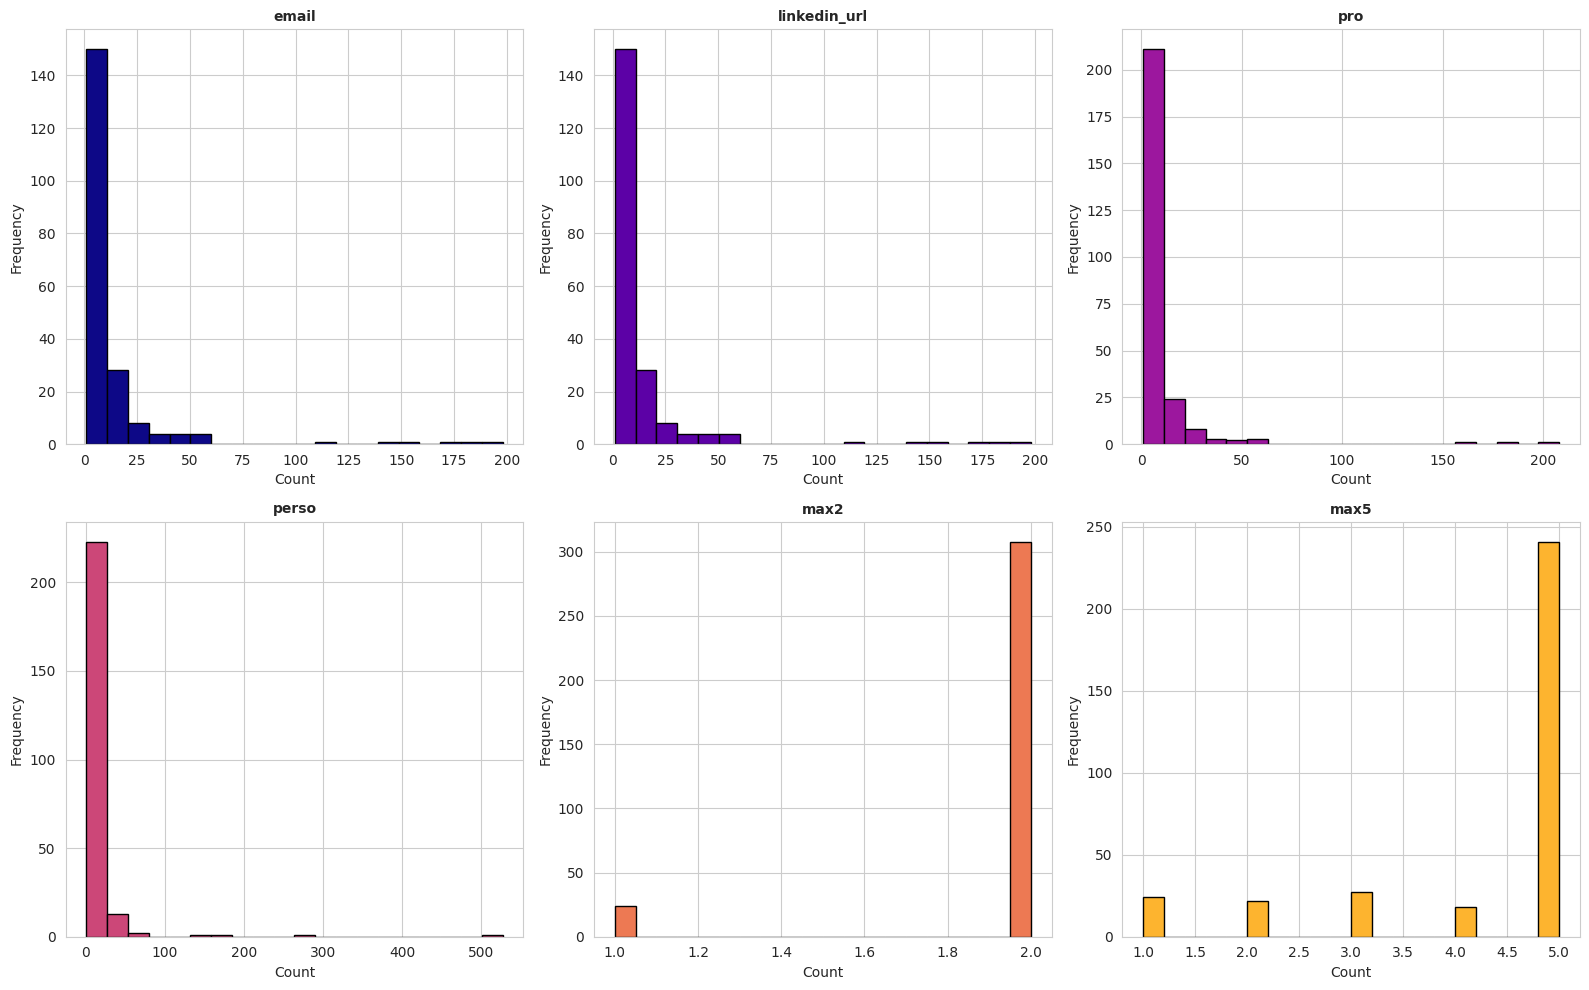

In [28]:
# Visualize contact metrics
contact_cols = [col for col in df_contacts.columns if 'contact' in col]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(contact_cols[:6]):
    data = df_contacts[df_contacts[col] > 0][col]
    if len(data) > 0:
        axes[idx].hist(data, bins=20, color=plt.cm.plasma(idx/len(contact_cols)), edgecolor='black')
        axes[idx].set_title(col.replace('nombre_societeinfo_contact_', ''), fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Count')
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [29]:
# Summary
print(f"\nContact Metrics Summary:\n")

for col in contact_cols:
    total = df_contacts[col].sum()
    companies_with_contacts = (df_contacts[col] > 0).sum()
    print(f" {col} : \n ")
    print(f"  Total contacts: {total}")
    print(f"  Companies with contacts: {companies_with_contacts} ({companies_with_contacts/len(df_contacts)*100:.1f}%)")


# contact_cols = [col for col in df_contacts.columns if 'contact' in col]


Contact Metrics Summary:

 nombre_societeinfo_contact_email : 
 
  Total contacts: 2713
  Companies with contacts: 204 (54.4%)
 nombre_societeinfo_contact_linkedin_url : 
 
  Total contacts: 2713
  Companies with contacts: 204 (54.4%)
 nombre_societeinfo_contact_pro : 
 
  Total contacts: 2195
  Companies with contacts: 254 (67.7%)
 nombre_societeinfo_contact_perso : 
 
  Total contacts: 3315
  Companies with contacts: 242 (64.5%)
 nombre_societeinfo_contact_max2 : 
 
  Total contacts: 640
  Companies with contacts: 332 (88.5%)
 nombre_societeinfo_contact_max5 : 
 
  Total contacts: 1426
  Companies with contacts: 332 (88.5%)


## 7. KPI Data

This dataset contains Key Performance Indicators by year (2014-2025).

**Note:** This is a long-format dataset with multiple rows per company (one per year).

**Use case:** Temporal trend analysis, year-over-year comparisons, financial performance tracking.


In [30]:
# Load KPI data
df_kpi = pd.read_csv(DATA_DIR / '07_kpi_data.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_kpi.shape}")
print(f"\nColumns: {list(df_kpi.columns)}")
display(df_kpi.head(10))


Dataset shape: (3779, 28)

Columns: ['company_name', 'siren', 'siret', 'year', 'fonds_propres', 'ca_france', 'date_cloture_exercice', 'duree_exercice', 'salaires_traitements', 'charges_financieres', 'impots_taxes', 'ca_bilan', 'resultat_exploitation', 'dotations_amortissements', 'capital_social', 'code_confidentialite', 'resultat_bilan', 'annee', 'effectif', 'effectif_sous_traitance', 'filiales_participations', 'evolution_ca', 'subventions_investissements', 'ca_export', 'evolution_effectif', 'participation_bilan', 'ca_consolide', 'resultat_net_consolide']


,company_name,siren,siret,year,fonds_propres,ca_france,date_cloture_exercice,duree_exercice,salaires_traitements,charges_financieres,...,effectif,effectif_sous_traitance,filiales_participations,evolution_ca,subventions_investissements,ca_export,evolution_effectif,participation_bilan,ca_consolide,resultat_net_consolide
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2023,2192166.0,6729652.0,2023-01-31,12.0,1394492.0,80993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2022,1614077.0,6247357.0,2022-01-31,12.0,1327711.0,81469.0,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2021,1497114.0,5296275.0,2021-01-31,12.0,1318083.0,66111.0,...,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2020,1577275.0,5710890.0,2020-01-31,12.0,1380952.0,70953.0,...,45.0,18930.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2019,1348804.0,5221375.0,2019-01-31,12.0,1230571.0,88389.0,...,43.0,15835.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2018,1492199.0,NaN,2018-01-31,12.0,1372333.0,385712.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2017,1419433.0,5630041.0,2017-01-31,12.0,1394179.0,47878.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2016,NaN,NaN,2016-01-31,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2015,NaN,NaN,2015-01-31,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,2025,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0772,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Summary
print(f"\nKPI Summary:")
print(f"Total records: {len(df_kpi)}")
print(f"Unique companies: {df_kpi['siren'].nunique()}")

# print(f"Years covered: {sorted(df_kpi['year'].unique())}")

print(f"\nRecords per year:")
print(df_kpi['year'].value_counts().sort_index())


KPI Summary:
Total records: 3779
Unique companies: 374

Records per year:
year
2010     15
2011     48
2012     58
2013    210
2014    242
2015    306
2016    291
2017    355
2018    282
2019    300
2020    330
2021    314
2022    342
2023    264
2024    278
2025    144
Name: count, dtype: int64


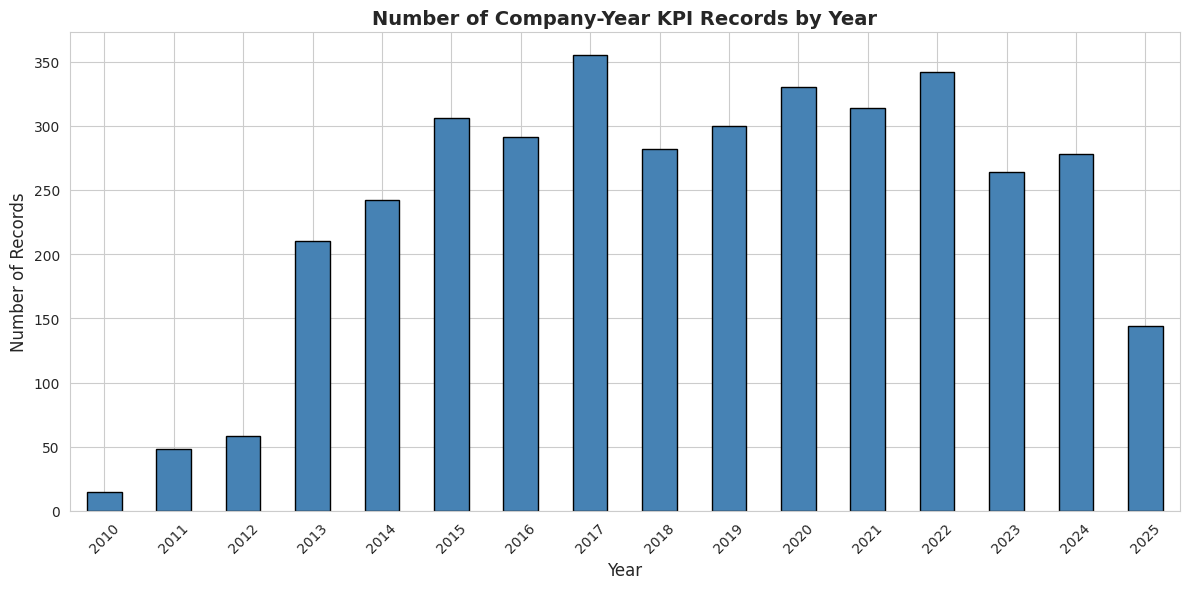

In [32]:
# Visualize KPI data over time
# Example: Show number of companies with KPI data per year
kpi_by_year = df_kpi.groupby('year').size()

plt.figure(figsize=(12, 6))
kpi_by_year.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Company-Year KPI Records by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
df_kpi.shape

(3779, 28)

In [34]:
# Show sample KPI metrics if available
kpi_metric_cols = [col for col in df_kpi.columns if col not in ['company_name', 'siren', 'siret', 'year']]
if len(kpi_metric_cols) > 0:
    print(f"\nSample KPI metrics (showing first 5): {kpi_metric_cols[:5]}")

    # Show a sample company's KPI over time
    sample_siren = df_kpi['siren'].iloc[0] # 1st line of our dataset = PAIN D'EPICES MULOT ET PETITJEAN
    sample_company = df_kpi[df_kpi['siren'] == sample_siren].sort_values('year') # sort by year for selected compagny
    print(f"\nSample: KPI data for company {sample_siren}:")
    display(sample_company[['year'] + kpi_metric_cols[:]].head(10))


Sample KPI metrics (showing first 5): ['fonds_propres', 'ca_france', 'date_cloture_exercice', 'duree_exercice', 'salaires_traitements']

Sample: KPI data for company 015751530:


,year,fonds_propres,ca_france,date_cloture_exercice,duree_exercice,salaires_traitements,charges_financieres,impots_taxes,ca_bilan,resultat_exploitation,...,effectif,effectif_sous_traitance,filiales_participations,evolution_ca,subventions_investissements,ca_export,evolution_effectif,participation_bilan,ca_consolide,resultat_net_consolide
10,2014,NaN,NaN,2014-01-31,12.0,NaN,NaN,NaN,6653070.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,NaN,NaN,2015-01-31,12.0,NaN,NaN,NaN,4905670.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,NaN,NaN,2016-01-31,12.0,NaN,NaN,NaN,4684680.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,1419433.0,5630041.0,2017-01-31,12.0,1394179.0,47878.0,78290.0,5630040.0,32986.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,1492199.0,NaN,2018-01-31,12.0,1372333.0,385712.0,81066.0,5971010.0,-47658.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1348804.0,5221375.0,2019-01-31,12.0,1230571.0,88389.0,73800.0,5221380.0,-247638.0,...,43.0,15835.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1577275.0,5710890.0,2020-01-31,12.0,1380952.0,70953.0,82085.0,5710890.0,93684.0,...,45.0,18930.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1497114.0,5296275.0,2021-01-31,12.0,1318083.0,66111.0,162691.0,5296275.0,-62109.0,...,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1614077.0,6247357.0,2022-01-31,12.0,1327711.0,81469.0,133727.0,6247357.0,65908.0,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2023,2192166.0,6729652.0,2023-01-31,12.0,1394492.0,80993.0,150846.0,6729652.0,76546.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. Signals

This dataset contains company signals and events.

**Note:** Only 70.9% of companies have signals (266 out of 375). Each company can have multiple signals.

**Use case:** Event tracking, signal analysis, company activity monitoring.


In [35]:
# Load signals data
df_signals = pd.read_csv(DATA_DIR / '08_signals.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_signals.shape}")
print(f"\nColumns: {list(df_signals.columns)}")
display(df_signals.head(10))

Dataset shape: (2133, 12)

Columns: ['company_name', 'siren', 'siret', 'continent', 'country', 'departement', 'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count', 'sirets_count']


,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'H', 'id': 8, 'label': 'Activité inte...",2018-04-05T11:14:31+02:00,1,1
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2014-05-20T00:00:00+02:00,True,"{'code': 'X', 'id': 25, 'label': 'Actualité en...",2014-05-16T10:10:24+02:00,1,1
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'U', 'id': 21, 'label': 'Nomination'}",2016-03-31T12:48:27+02:00,1,1
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,"[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2016-09-21T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2016-09-20T10:45:56+02:00,1,1
9,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'Hbis', 'id': 24, 'label': 'Activité ...",2016-03-28T19:33:31+02:00,1,1


In [36]:
# Summary
print(f"\nSignals Summary:")
print(f"Total signal records: {len(df_signals)}")
print(f"Unique companies with signals: {df_signals['siren'].nunique()}")
print(f"Average signals per company: {len(df_signals) / df_signals['siren'].nunique():.1f}")
print(f"\nSignal types:")
if 'type' in df_signals.columns:
    print(df_signals['type'].value_counts().head(10))
print(f"\nCountries:")
if 'country' in df_signals.columns:
    print(df_signals['country'].value_counts().head(10))



Signals Summary:
Total signal records: 2133
Unique companies with signals: 266
Average signals per company: 8.0

Signal types:
type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}           

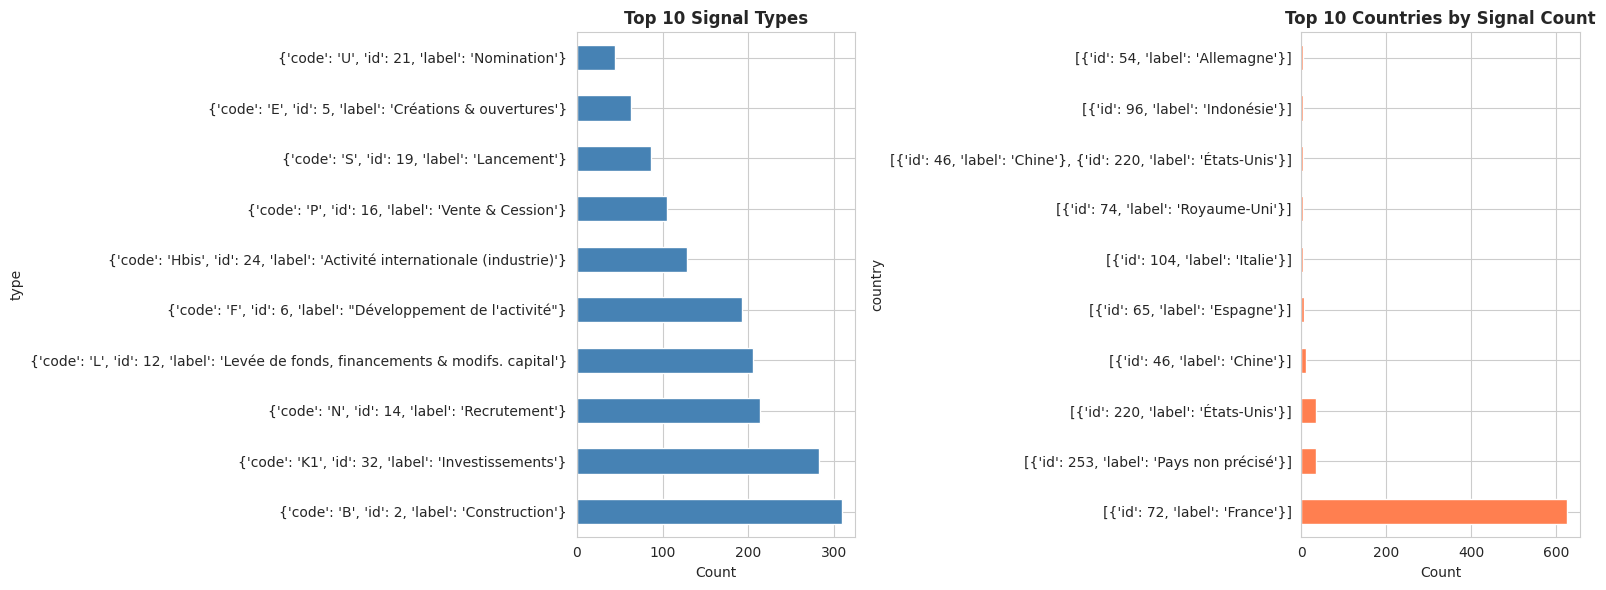

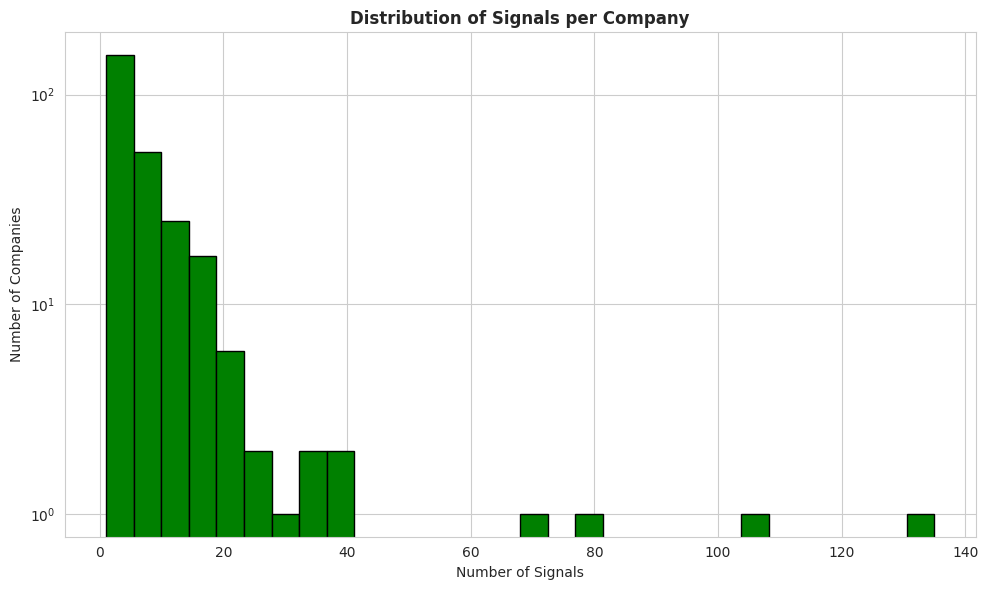

In [37]:
# Visualize signals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'type' in df_signals.columns:
    signal_types = df_signals['type'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_signals.columns:
    countries = df_signals['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Signal Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Signals per company distribution
signals_per_company = df_signals.groupby('siren').size()
plt.figure(figsize=(10, 6))
signals_per_company.hist(bins=30, color='green', edgecolor='black')
plt.title('Distribution of Signals per Company', fontweight='bold')
plt.xlabel('Number of Signals')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()


## 9. Articles

This dataset contains articles and news related to companies.

**Note:** Only 70.9% of companies have articles (266 out of 375). Each company can have multiple articles.

**Use case:** News analysis, media coverage tracking, company visibility assessment.


In [38]:
# Load articles data
df_articles = pd.read_csv(DATA_DIR / '09_articles.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_articles.shape}")
print(f"\nColumns: {list(df_articles.columns)}")
display(df_articles.head(10))

Dataset shape: (1180, 13)

Columns: ['company_name', 'siren', 'siret', 'title', 'publishedAt', 'author', 'signalsStatus', 'signalsType', 'country', 'sectors', 'cities', 'sources', 'all_companies_count']


,company_name,siren,siret,title,publishedAt,author,signalsStatus,signalsType,country,sectors,cities,sources,all_companies_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et Petitjean va injecter 1M€ dans la rén...,2019-12-31T00:00:00+01:00,"{'initial': 'M.L', 'name': 'Mathieu Lallement'...",[{'label': 'Détecté'}],[{'label': 'Investissements'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Rémy DISSOUBRAY', 'datePub': '19/1...",1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Les produits bourguignons à la conquête de la ...,2014-05-20T00:00:00+02:00,"{'initial': 'S.R', 'name': 'Soizic RIGAL', 'id...","[{'label': 'Détecté'}, {'label': 'Détecté'}]","[{'label': 'Actualité entreprise'}, {'label': ...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Adrien Cahuzac', 'datePub': '15/05...",5
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et Petitjean investit 6 M€ et prévoit de...,2016-04-12T00:00:00+02:00,NaN,"[{'label': 'Détecté'}, {'label': 'Détecté'}, {...","[{'label': 'Construction'}, {'label': 'Investi...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Magali Fichter', 'datePub': '08/04...",1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et PetitJean à la conquête de la scène i...,2014-03-26T00:00:00+01:00,"{'initial': 'M.N', 'name': 'Maxime Negrier', '...","[{'label': 'Détecté'}, {'label': 'Détecté'}, {...",[{'label': 'Activité internationale (tertiaire...,"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'datePub': '05/03/2014', 'urlWeb': 'http://ww...",1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et Petitjean précise ses projets d'inves...,2021-10-06T00:00:00+02:00,"{'initial': 'B.P', 'name': 'Bastien Pechereau'...",[{'label': 'Suivi'}],[{'label': 'Investissements'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'C.P.', 'datePub': '28/09/2021', 'u...",1
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et Petitjean affiche ses ambitions à l'e...,2016-04-01T00:00:00+02:00,"{'initial': 'R.L', 'name': 'Romain Landry', 'i...",[{'label': 'Détecté'}],[{'label': 'Activité internationale (industrie...,"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'datePub': 'n°264', 'urlWeb': 'http://www.man...",1
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Pains d’épices Mulot et Petitjean investit,2020-09-08T00:00:00+02:00,"{'initial': 'C.M', 'name': 'Camille Monier', '...","[{'label': 'Détecté'}, {'label': 'Suivi'}]","[{'label': 'Levée de fonds, financements & mod...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'urlWeb': 'https://www.decidento.com/', 'id':...",1
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Alliance 7,2016-04-01T00:00:00+02:00,"{'initial': 'S.R', 'name': 'Soizic RIGAL', 'id...",[{'label': 'Détecté'}],[{'label': 'Nomination'}],"{'id': 72, 'label': 'France'}","{'logo': 'Administration180.png', 'industry': ...","{'zipCode': '75008', 'code': '75108', 'latitud...",NaN,2
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,Mulot et Petitjean veut s'agrandir,2015-10-21T00:00:00+02:00,"{'initial': 'R.L', 'name': 'Romain Landry', 'i...",[{'label': 'Détecté'}],[{'label': 'Construction'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...",

In [39]:
# Summary
print(f"\nArticles Summary:")
print(f"Total article records: {len(df_articles)}")
print(f"Unique companies with articles: {df_articles['siren'].nunique()}")
print(f"Average articles per company: {len(df_articles) / df_articles['siren'].nunique():.1f}")
print(f"\nSignal status:")
if 'signalsStatus' in df_articles.columns:
    print(df_articles['signalsStatus'].value_counts())
print(f"\nSignal types:")
if 'signalsType' in df_articles.columns:
    print(df_articles['signalsType'].value_counts().head(10))



Articles Summary:
Total article records: 1180
Unique companies with articles: 266
Average articles per company: 4.4

Signal status:
signalsStatus
[{'label': 'Détecté'}]                                                                                                                                    379
[{'label': 'Détecté'}, {'label': 'Détecté'}]                                                                                                              222
[{'label': 'Détecté'}, {'label': 'Détecté'}, {'label': 'Détecté'}]                                                                                        119
[{'label': 'Suivi'}]                                                                                                                                       83
[{'label': 'Suivi'}, {'label': 'Détecté'}]                                                                                                                 45
                                                               

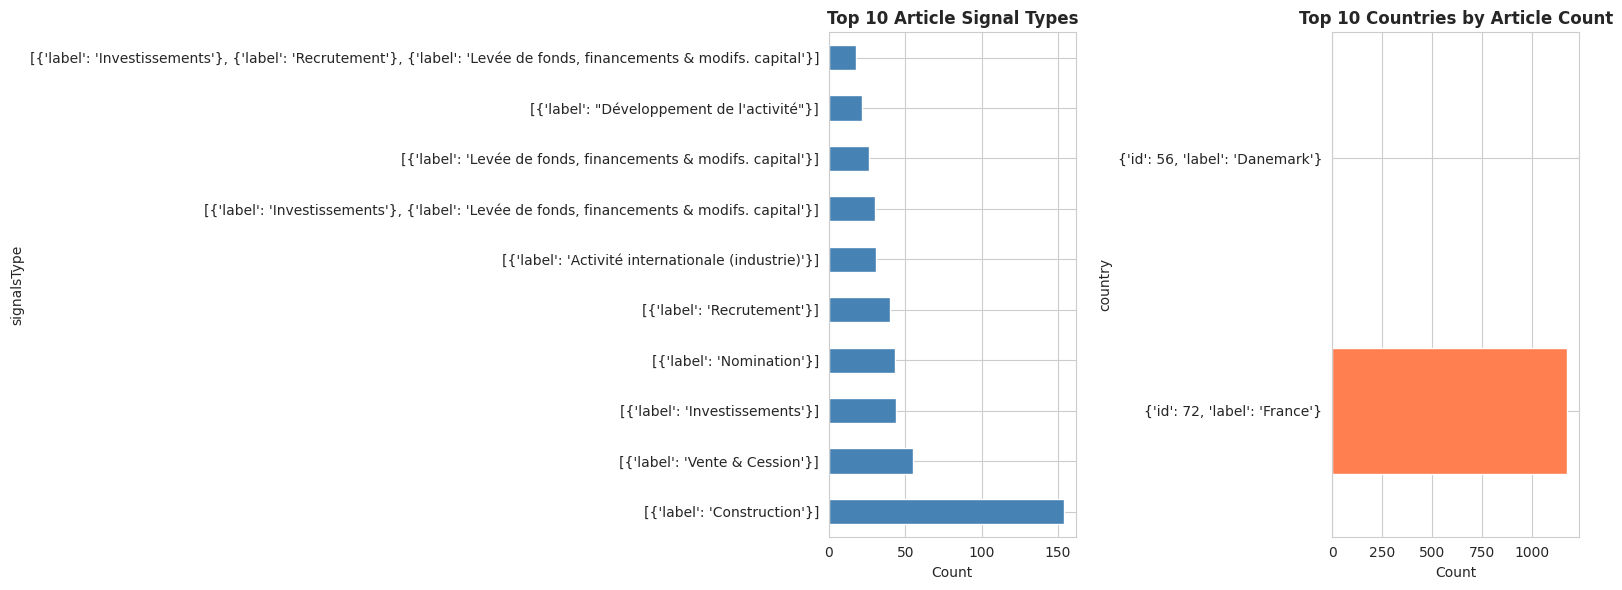

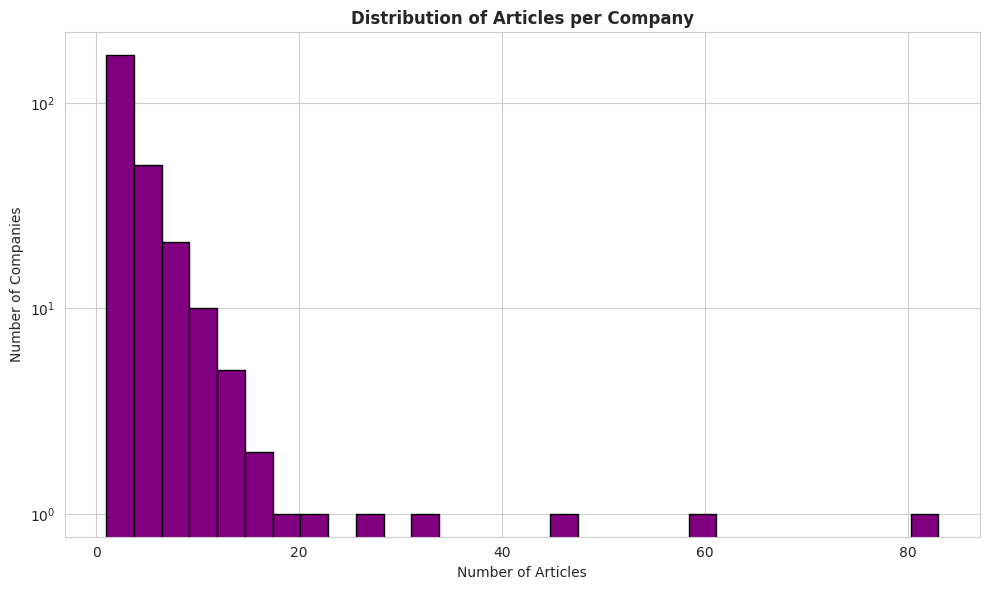

In [40]:
# Visualize articles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'signalsType' in df_articles.columns:
    signal_types = df_articles['signalsType'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Article Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_articles.columns:
    countries = df_articles['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Article Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Articles per company distribution
articles_per_company = df_articles.groupby('siren').size()
plt.figure(figsize=(10, 6))
articles_per_company.hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Articles per Company', fontweight='bold')
plt.xlabel('Number of Articles')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [41]:
# Show sample article titles
if 'title' in df_articles.columns:
    print("\nSample Article Titles:")
    sample_titles = df_articles['title'].dropna().head(5) # < -- SELECT SAMPLE NUMBER HERE
    for idx, title in enumerate(sample_titles, 1):
        print(f"{idx}. {title[:100]}..." if len(title) > 100 else f"{idx}. {title}")


Sample Article Titles:
1. Mulot et Petitjean va injecter 1M€ dans la rénovation de son matériel
2. Les produits bourguignons à la conquête de la Chine
3. Mulot et Petitjean investit 6 M€ et prévoit de recruter 25 personnes
4. Mulot et PetitJean à la conquête de la scène internationale
5. Mulot et Petitjean précise ses projets d'investissements à Dijon


## Dataset Relationships

All datasets can be joined using the index columns: `company_name`, `siren`, and `siret`.

Here's an example of joining multiple datasets:


In [42]:
# Example: Join basic info with financial and workforce data
df_merged = pd.merge(
    df_basic[['siren', 'company_name', 'departement', 'resume_activite']],
    df_financial[['siren', 'caConsolide', 'caGroupe']],
    on='siren',
    how='left'
)

df_merged = pd.merge(
    df_merged,
    df_workforce[['siren', 'effectifEstime']],
    on='siren',
    how='left'
)

print(f"Merged dataset shape: {df_merged.shape}")
print(f"\nSample merged data:")
display(df_merged.head(10))


Merged dataset shape: (375, 7)

Sample merged data:


,siren,company_name,departement,resume_activite,caConsolide,caGroupe,effectifEstime
0,000132066,PROCONI,00,fabrication de plats cuisinés frais pour la gr...,0.0,0.0,75.0
1,015751530,PAIN D'EPICES MULOT ET PETITJEAN,21,Spécialisée en pains d'épices et pâtisseries a...,0.0,0.0,0.0
2,016450298,JULIEN MACK,92,Préparation industrielle de produits à base de...,0.0,0.0,0.0
3,046580031,OROC BAT,64,"fabrication de conserves, charcuterie et jambo...",0.0,0.0,0.0
4,057504649,MINOTERIE DU TRIEVES CORREARD ET FILS,38,fabrication de farines,0.0,0.0,30.0
5,057821266,MAISON CANTINI FLANDIN,13,Fabrication transformation achat et vente de t...,0.0,0.0,0.0
6,086781150,AUVRAY-AUXY EN GATINAIS,45,fabricant de volailles et produits transformés...,0.0,0.0,0.0
7,096780838,BIRABEN,64,fabrication de plats préparés,0.0,0.0,40.0
8,099378564,LAITERIE DE MAYOTTE,976,fabrication de lait liquide et de produits lai...,NaN,NaN,NaN
9,300700119,SALAISONS CHAMBADE,71,"fabricant de produits à base de viande, charcu...",0.0,0.0,0.0


In [43]:
# Summary of merged data
print(f"\nMerged Data Summary:")
print(f"Companies with all data: {df_merged[['caConsolide', 'effectifEstime']].notna().all(axis=1).sum()}")


Merged Data Summary:
Companies with all data: 298


## Conclusion

This notebook has demonstrated:
1. The structure and content of each of the 9 extracted datasets
2. Basic visualizations for understanding data distributions
3. How to join datasets using the index columns

Each dataset is now in a human-readable format and can be easily analyzed, visualized, and used for machine learning or business intelligence purposes.


In [44]:
print("Colonnes de df_kpi :")
print(df_kpi.columns.tolist())

# Pour t'aider à repérer les cibles
print("\nColonnes contenant 'ca' :")
print([c for c in df_kpi.columns if "ca" in c.lower()])

print("\nColonnes contenant 'effectif' :")
print([c for c in df_kpi.columns if "effectif" in c.lower()])

print("\nColonnes contenant 'result' :")
print([c for c in df_kpi.columns if "result" in c.lower()])

Colonnes de df_kpi :
['company_name', 'siren', 'siret', 'year', 'fonds_propres', 'ca_france', 'date_cloture_exercice', 'duree_exercice', 'salaires_traitements', 'charges_financieres', 'impots_taxes', 'ca_bilan', 'resultat_exploitation', 'dotations_amortissements', 'capital_social', 'code_confidentialite', 'resultat_bilan', 'annee', 'effectif', 'effectif_sous_traitance', 'filiales_participations', 'evolution_ca', 'subventions_investissements', 'ca_export', 'evolution_effectif', 'participation_bilan', 'ca_consolide', 'resultat_net_consolide']

Colonnes contenant 'ca' :
['ca_france', 'ca_bilan', 'capital_social', 'evolution_ca', 'ca_export', 'ca_consolide']

Colonnes contenant 'effectif' :
['effectif', 'effectif_sous_traitance', 'evolution_effectif']

Colonnes contenant 'result' :
['resultat_exploitation', 'resultat_bilan', 'resultat_net_consolide']


In [45]:
print(len(df_kpi['year']))
print(len(df_kpi['annee']))

3779
3779


In [46]:
# ==== CONSTRUCTION DU MASTER PANEL FIRM-YEAR ====
# Identifiants + temps
ID_COLS = ["siren", "siret", "company_name"]
TIME_COL = "year"

# Targets (ce qu'on veut prédire en N+1)
CA_COL       = "ca_bilan"
EFFECTIF_COL = "effectif"
RESULT_COL   = "resultat_bilan"
TARGET_COLS = [CA_COL, EFFECTIF_COL, RESULT_COL]

# Features que à conserver (hors targets et hors data leakage)
FEATURE_COLS = [
    "fonds_propres",
    "salaires_traitements",
    "charges_financieres",
    "impots_taxes",
    "dotations_amortissements",
    "capital_social",
    "effectif_sous_traitance",
    "filiales_participations",
    "subventions_investissements",
    "participation_bilan",
]

# =========================
# 2. Construction du master_df
# =========================

# On vérifie que tout existe bien dans df_kpi
all_needed_cols = ID_COLS + [TIME_COL] + FEATURE_COLS + TARGET_COLS
missing = [c for c in all_needed_cols if c not in df_kpi.columns]
if missing:
    print("⚠️ Colonnes manquantes dans df_kpi :", missing)


In [47]:
# On construit le panel firm-year propre
master_df = df_kpi[all_needed_cols].copy()

# Nettoyage minimal
master_df = master_df.dropna(subset=["siren", TIME_COL])
master_df["siren"] = master_df["siren"].astype(str)
master_df[TIME_COL] = master_df[TIME_COL].astype(int)

# Tri par entreprise + année (important pour la suite RNN)
master_df = master_df.sort_values(["siren", TIME_COL]).reset_index(drop=True)

print("master_df shape :", master_df.shape)
display(master_df.tail(20))

master_df shape : (3779, 17)


,siren,siret,company_name,year,fonds_propres,salaires_traitements,charges_financieres,impots_taxes,dotations_amortissements,capital_social,effectif_sous_traitance,filiales_participations,subventions_investissements,participation_bilan,ca_bilan,effectif,resultat_bilan
3759,947351656,94735165600030,SAS BEYER,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5384000.0,NaN,NaN
3760,947351656,94735165600030,SAS BEYER,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3761,947351656,94735165600030,SAS BEYER,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
3762,947351656,94735165600030,SAS BEYER,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN
3763,947351656,94735165600030,SAS BEYER,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3764,947351656,94735165600030,SAS BEYER,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3765,947351656,94735165600030,SAS BEYER,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3766,947351656,94735165600030,SAS BEYER,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN
3767,947351656,94735165600030,SAS BEYER,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3768,947351656,94735165600030,SAS BEYER,2024,NaN,NaN,NaN,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN


In [48]:
# ================================
# Pourcentage de NaN par colonne
# ================================

nan_percent = (
    master_df.isna()
    .mean() * 100
)

nan_percent = nan_percent.sort_values(ascending=False)

print("📊 Pourcentage de valeurs manquantes par colonne :\n")
display(nan_percent.to_frame("percent_nan"))

📊 Pourcentage de valeurs manquantes par colonne :



,percent_nan
filiales_participations,99.259063
effectif_sous_traitance,95.263297
participation_bilan,95.236835
subventions_investissements,76.448796
dotations_amortissements,64.990738
charges_financieres,64.726118
salaires_traitements,64.011643
impots_taxes,63.641175
effectif,56.708124
fonds_propres,52.527124


In [49]:
cols_to_drop = [
    "filiales_participations",
    "effectif_sous_traitance",
    "participation_bilan",
    "siret"
]
master_df = master_df.drop(columns=cols_to_drop)

In [50]:
# Ajout des flags de missingness qui permettront à un model RNN d'être plus performant (Paper “Deep Learning for Time Series Forecasting” (Lim & Zohdy))

features_cols_2 = [x for x in FEATURE_COLS if x not in cols_to_drop]

col_to_flag = features_cols_2 + [CA_COL, EFFECTIF_COL, RESULT_COL]

for col in col_to_flag:
    master_df[f"{col}_was_nan"] = master_df[col].isna().astype(int)

In [51]:
master_df.head()

,siren,company_name,year,fonds_propres,salaires_traitements,charges_financieres,impots_taxes,dotations_amortissements,capital_social,subventions_investissements,...,fonds_propres_was_nan,salaires_traitements_was_nan,charges_financieres_was_nan,impots_taxes_was_nan,dotations_amortissements_was_nan,capital_social_was_nan,subventions_investissements_was_nan,ca_bilan_was_nan,effectif_was_nan,resultat_bilan_was_nan
0,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,0,1,0
1,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,0,1,0
2,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,0,1,0
3,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2017,1419433.0,1394179.0,47878.0,78290.0,NaN,120000.0,NaN,...,0,0,0,0,1,0,1,0,0,0
4,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2018,1492199.0,1372333.0,385712.0,81066.0,510525.0,120000.0,NaN,...,0,0,0,0,0,0,1,0,0,0


In [52]:
# ================================
# Imputation des valeurs manquantes dans master_df
# ================================

# Liste finale des colonnes de features (hors IDs, year et targets)
FEATURE_COLS_FINAL = [
    col for col in master_df.columns
    if col not in ["siren", "siret", "company_name", "year",
                   CA_COL, EFFECTIF_COL, RESULT_COL]
]

print("Nombre de colonnes de features :", len(FEATURE_COLS_FINAL))

Nombre de colonnes de features : 17


In [53]:
col_to_flag

['fonds_propres',
 'salaires_traitements',
 'charges_financieres',
 'impots_taxes',
 'dotations_amortissements',
 'capital_social',
 'subventions_investissements',
 'ca_bilan',
 'effectif',
 'resultat_bilan']

In [54]:
#IMPUTATION à pipeliner plus tard

# --- Étape 1 : tri par entreprise + année ---
master_df = master_df.sort_values(["siren", "year"]).reset_index(drop=True)

# --- Étape 2 : ffill + bfill par entreprise ---
cols_to_impute = col_to_flag
master_df[cols_to_impute] = (
    master_df
    .groupby("siren")[cols_to_impute]
    .apply(lambda g: g.ffill().bfill())
    .reset_index(drop=True)
)

In [55]:
# ================================
# Pourcentage de NaN par colonne
# ================================

nan_percent = (
    master_df.isna()
    .mean() * 100
)

nan_percent = nan_percent.sort_values(ascending=False)

print("📊 Pourcentage de valeurs manquantes par colonne :\n")
display(nan_percent.to_frame("percent_nan"))

📊 Pourcentage de valeurs manquantes par colonne :



,percent_nan
subventions_investissements,41.386610
dotations_amortissements,16.829849
charges_financieres,16.724001
salaires_traitements,15.850754
impots_taxes,15.559672
fonds_propres,7.012437
resultat_bilan,6.509659
ca_bilan,0.555703
capital_social,0.344006
effectif,0.291082


In [56]:
# --- Étape 3 : imputation finale par la médiane globale pour données encore manquantes---
for col in cols_to_impute:
    if master_df[col].isna().sum() > 0:
        median_value = master_df[col].median()
        master_df[col] = master_df[col].fillna(median_value)

In [57]:
print(" Vérification : valeurs manquantes restantes après imputation :")
# ================================
# Pourcentage de NaN par colonne
# ================================

nan_percent = (
    master_df.isna()
    .mean() * 100
)

nan_percent = nan_percent.sort_values(ascending=False)

print("📊 Pourcentage de valeurs manquantes par colonne :\n")
display(nan_percent.to_frame("percent_nan"))

 Vérification : valeurs manquantes restantes après imputation :
📊 Pourcentage de valeurs manquantes par colonne :



,percent_nan
siren,0.0
company_name,0.0
year,0.0
fonds_propres,0.0
salaires_traitements,0.0
charges_financieres,0.0
impots_taxes,0.0
dotations_amortissements,0.0
capital_social,0.0
subventions_investissements,0.0


On va maintenant travailler la df_signals pour récupérer l'année des signaux, one hot encoder selon le type de signal et la merger avec le master_df

In [58]:
df_signals['publishedAt']

0       2021-09-30T00:00:00+02:00
1       2020-09-08T00:00:00+02:00
2       2016-09-21T00:00:00+02:00
3       2018-04-06T00:00:00+02:00
4       2018-04-06T00:00:00+02:00
                  ...            
2128    2018-04-09T00:00:00+02:00
2129    2022-02-07T00:00:00+01:00
2130    2022-02-07T00:00:00+01:00
2131    2019-06-06T00:00:00+02:00
2132    2017-10-24T00:00:00+02:00
Name: publishedAt, Length: 2133, dtype: object

In [59]:
import ast
from sklearn.preprocessing import OneHotEncoder

df_signals["siren"] = df_signals["siren"].astype(str)
master_df["siren"] = master_df["siren"].astype(str)

# Extraire l'année de publishedAt
# Conversion robuste en datetime
df_signals["publishedAt_dt"] = pd.to_datetime(
    df_signals["publishedAt"],
    errors="coerce",   # Si une ligne est complètement cheloue → NaT
    utc=True           # Force un timezone
)

# Extraction de l'année
df_signals["year"] = df_signals["publishedAt_dt"].dt.year

print(df_signals[["publishedAt", "publishedAt_dt", "year"]].head())
print("Type de publishedAt_dt :", df_signals["publishedAt_dt"].dtype)


                 publishedAt            publishedAt_dt  year
0  2021-09-30T00:00:00+02:00 2021-09-29 22:00:00+00:00  2021
1  2020-09-08T00:00:00+02:00 2020-09-07 22:00:00+00:00  2020
2  2016-09-21T00:00:00+02:00 2016-09-20 22:00:00+00:00  2016
3  2018-04-06T00:00:00+02:00 2018-04-05 22:00:00+00:00  2018
4  2018-04-06T00:00:00+02:00 2018-04-05 22:00:00+00:00  2018
Type de publishedAt_dt : datetime64[ns, UTC]


In [60]:
df_signals['type'][0]

"{'code': 'K1', 'id': 32, 'label': 'Investissements'}"

In [61]:
# Fonction pour extraire le code du signal
def extract_signal_code(x):
    if isinstance(x, dict):
        return x.get("code")
    if isinstance(x, str):
        try:
            d = ast.literal_eval(x)
            if isinstance(d, dict):
                return d.get("code")
        except:
            return np.nan
    return np.nan

df_signals["signal_code"] = df_signals["type"].apply(extract_signal_code)


In [62]:
df_signals.head(3)

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count,publishedAt_dt,year,signal_code
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1,2021-09-29 22:00:00+00:00,2021,K1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1,2020-09-07 22:00:00+00:00,2020,L
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1,2016-09-20 22:00:00+00:00,2016,F


In [63]:
df_signals['signal_code'].unique()

array(['K1', 'L', 'F', 'E', 'H', 'X', 'U', 'Hbis', 'B', 'S', 'N', 'Z2',
       'Z1', 'P', 'Z3', 'M', 'G', 'R', 'D', 'I', 'Y', 'W', 'O', 'A', 'Z'],
      dtype=object)

In [64]:
signals_clean = df_signals.dropna(subset=["siren", "year", "signal_code"]).copy()

signals_clean = signals_clean[["siren", "year", "signal_code"]]
signals_clean.head()

# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot = ohe.fit_transform(signals_clean[["signal_code"]])

# On remet ça dans un DataFrame
df_onehot = pd.DataFrame(
    onehot,
    columns=[f"signal_{c}_count" for c in ohe.categories_[0]]
)

signals_encoded = pd.concat([signals_clean.reset_index(drop=True), df_onehot], axis=1)
signals_encoded.head()


,siren,year,signal_code,signal_A_count,signal_B_count,signal_D_count,signal_E_count,signal_F_count,signal_G_count,signal_H_count,...,signal_R_count,signal_S_count,signal_U_count,signal_W_count,signal_X_count,signal_Y_count,signal_Z_count,signal_Z1_count,signal_Z2_count,signal_Z3_count
0,015751530,2021,K1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015751530,2020,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015751530,2016,F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015751530,2018,F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015751530,2018,E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Agréger par siren + year : on somme les colonnes one-hot
signals_agg = (
    signals_encoded
    .groupby(["siren", "year"])
    .sum()
    .reset_index()
)
signals_agg = signals_agg.drop(columns='signal_code')
print("signals_agg shape :", signals_agg.shape)
display(signals_agg.head())


signals_agg shape : (729, 27)


,siren,year,signal_A_count,signal_B_count,signal_D_count,signal_E_count,signal_F_count,signal_G_count,signal_H_count,signal_Hbis_count,...,signal_R_count,signal_S_count,signal_U_count,signal_W_count,signal_X_count,signal_Y_count,signal_Z_count,signal_Z1_count,signal_Z2_count,signal_Z3_count
0,015751530,2014,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,015751530,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015751530,2016,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015751530,2018,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015751530,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
master_df.head()

,siren,company_name,year,fonds_propres,salaires_traitements,charges_financieres,impots_taxes,dotations_amortissements,capital_social,subventions_investissements,...,fonds_propres_was_nan,salaires_traitements_was_nan,charges_financieres_was_nan,impots_taxes_was_nan,dotations_amortissements_was_nan,capital_social_was_nan,subventions_investissements_was_nan,ca_bilan_was_nan,effectif_was_nan,resultat_bilan_was_nan
0,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2014,1419433.0,1394179.0,47878.0,78290.0,510525.0,120000.0,74831.0,...,1,1,1,1,1,1,1,0,1,0
1,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2015,1419433.0,1394179.0,47878.0,78290.0,510525.0,120000.0,74831.0,...,1,1,1,1,1,1,1,0,1,0
2,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2016,1419433.0,1394179.0,47878.0,78290.0,510525.0,120000.0,74831.0,...,1,1,1,1,1,1,1,0,1,0
3,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2017,1419433.0,1394179.0,47878.0,78290.0,510525.0,120000.0,74831.0,...,0,0,0,0,1,0,1,0,0,0
4,015751530,PAIN D'EPICES MULOT ET PETITJEAN,2018,1492199.0,1372333.0,385712.0,81066.0,510525.0,120000.0,74831.0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
master_df["siren"] = master_df["siren"].astype(str)
signals_agg["siren"] = signals_agg["siren"].astype(str)

# Merge avec Master DF sur siren + year
master_df = master_df.merge(
    signals_agg,
    on=["siren", "year"],
    how="left"
)

# Trouver toutes les colonnes de signaux
signal_cols = [c for c in master_df.columns if c.startswith("signal_")]

# Remplacer les NaN (années sans signaux) par 0
master_df[signal_cols] = master_df[signal_cols].fillna(0).astype(int)

print("master_df shape après merge signaux :", master_df.shape)
display(master_df[["siren", "year"] + signal_cols].head())

master_df shape après merge signaux : (3779, 48)


,siren,year,signal_A_count,signal_B_count,signal_D_count,signal_E_count,signal_F_count,signal_G_count,signal_H_count,signal_Hbis_count,...,signal_R_count,signal_S_count,signal_U_count,signal_W_count,signal_X_count,signal_Y_count,signal_Z_count,signal_Z1_count,signal_Z2_count,signal_Z3_count
0,015751530,2014,0,1,0,0,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0
1,015751530,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,015751530,2016,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,015751530,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,015751530,2018,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


On passe au séquençage!

In [68]:
# Identifiants + temps
ID_COLS = ["siren", "company_name"]
TIME_COL = "year"

# Targets
CA_COL       = "ca_bilan"
EFFECTIF_COL = "effectif"
RESULT_COL   = "resultat_bilan"
TARGET_COLS  = [CA_COL, EFFECTIF_COL, RESULT_COL]

# Toutes les features utilisées par le RNN
FEATURE_COLS_RNN = [
    c for c in master_df.columns
    if c not in ID_COLS + [TIME_COL] + TARGET_COLS
]

print("Nb de features pour le RNN :", len(FEATURE_COLS_RNN))
#FEATURE_COLS_RNN


Nb de features pour le RNN : 42


In [69]:
# Attention il va falloir penser à une stratégie d'imuting pour les targets:
nan_percent = (
    master_df.isna()
    .mean() * 100
)

nan_percent = nan_percent.sort_values(ascending=False)

print("📊 Pourcentage de valeurs manquantes par colonne :\n")
display(nan_percent.to_frame("percent_nan"))

📊 Pourcentage de valeurs manquantes par colonne :



,percent_nan
siren,0.0
company_name,0.0
year,0.0
fonds_propres,0.0
salaires_traitements,0.0
charges_financieres,0.0
impots_taxes,0.0
dotations_amortissements,0.0
capital_social,0.0
subventions_investissements,0.0


Fonction make_sequences (pour X sur 3 ans → et Y N+1) + padding? ou drop des données entreprise ayant des trous au milieu des 4 ans.

In [70]:
ID_COL = "siren"
TIME_COL = "year"

CA_COL       = "ca_bilan"
EFFECTIF_COL = "effectif"
RESULT_COL   = "resultat_bilan"
TARGET_COLS  = [CA_COL, EFFECTIF_COL, RESULT_COL]

COVARIATE_COLS = [
    c for c in master_df.columns
    if c not in [ID_COL, "company_name", TIME_COL] + TARGET_COLS
]

print("Targets :", TARGET_COLS)
print("Nb de covariates :", len(COVARIATE_COLS))


Targets : ['ca_bilan', 'effectif', 'resultat_bilan']
Nb de covariates : 42


In [71]:
def build_sequences_panel_3y_next(
    df: pd.DataFrame,
    id_col: str,
    time_col: str,
    target_cols,
    covariate_cols,
    seq_len: int = 3,
):
    all_X = []
    all_y = []
    meta_rows = []

    # data = [targets | covariates]
    all_cols = list(target_cols) + list(covariate_cols)
    n_targets = len(target_cols)

    df = df.sort_values([id_col, time_col]).copy()

    for company_id, company_df in df.groupby(id_col):
        company_df = company_df.sort_values(time_col)

        years = company_df[time_col].to_numpy()
        data  = company_df[all_cols].to_numpy(dtype=float)

        n = len(company_df)
        if n <= seq_len:
            continue

        X_company = []
        y_company = []

        for i in range(0, n - seq_len):
            window_years = years[i : i + seq_len + 1]  # 3 ans + année cible

            # on exige des années consécutives
            if not np.all(np.diff(window_years) == 1):
                continue

            # ✅ X = targets + covariates sur les 3 années passées
            Xi_feat = data[i : i + seq_len, :]      # (3, n_features_total)

            # ✅ y = targets de l'année suivante
            yi_tgt  = data[i + seq_len, :n_targets] # (3,)

            X_company.append(Xi_feat)
            y_company.append(yi_tgt)

            meta_rows.append({
                id_col: company_id,
                "year_input_start": int(window_years[0]),
                "year_input_end":   int(window_years[seq_len - 1]),
                "year_target":      int(window_years[-1]),
            })

        if len(X_company) == 0:
            continue

        all_X.append(np.array(X_company))
        all_y.append(np.array(y_company))

    X = np.concatenate(all_X, axis=0)   # (n_seq, 3, n_features_total)
    y = np.concatenate(all_y, axis=0)   # (n_seq, 3)
    meta_df = pd.DataFrame(meta_rows)

    print("X shape :", X.shape)
    print("y shape :", y.shape)
    print("meta_df shape :", meta_df.shape)

    return X, y, meta_df


In [72]:
X, y, meta_df = build_sequences_panel_3y_next(
    df=master_df,
    id_col="siren",
    time_col="year",
    target_cols=TARGET_COLS,
    covariate_cols=COVARIATE_COLS,
    seq_len=3,
)


X shape : (2223, 3, 45)
y shape : (2223, 3)
meta_df shape : (2223, 4)


In [73]:
meta_df.head()

,siren,year_input_start,year_input_end,year_target
0,015751530,2014,2016,2017
1,015751530,2015,2017,2018
2,015751530,2016,2018,2019
3,015751530,2017,2019,2020
4,015751530,2018,2020,2021


In [74]:
y[7]

array([6.954431e+06, 2.800000e+01, 5.435730e+05])

In [75]:
# Exemple
print(meta_df.iloc[7])

test = pd.DataFrame(
    X[7],
    columns=TARGET_COLS + COVARIATE_COLS,
    index=["t-2", "t-1", "t"]
)
test.head()

siren               016450298
year_input_start         2015
year_input_end           2017
year_target              2018
Name: 7, dtype: object


,ca_bilan,effectif,resultat_bilan,fonds_propres,salaires_traitements,charges_financieres,impots_taxes,dotations_amortissements,capital_social,subventions_investissements,...,signal_R_count,signal_S_count,signal_U_count,signal_W_count,signal_X_count,signal_Y_count,signal_Z_count,signal_Z1_count,signal_Z2_count,signal_Z3_count
t-2,9384000.0,28.0,651810.0,1580870.0,1089357.0,21836.0,136657.0,150039.0,257600.0,13226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t-1,7818072.0,28.0,651810.0,1580870.0,1089357.0,21836.0,136657.0,150039.0,257600.0,13226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,7491004.0,28.0,-8439773.0,1580870.0,1089357.0,21836.0,136657.0,150039.0,257600.0,13226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print("y[7] détaillé :")
print(dict(zip(TARGET_COLS, y[7])))

y[7] détaillé :
{'ca_bilan': np.float64(6954431.0), 'effectif': np.float64(28.0), 'resultat_bilan': np.float64(543573.0)}


In [77]:
meta_df

,siren,year_input_start,year_input_end,year_target
0,015751530,2014,2016,2017
1,015751530,2015,2017,2018
2,015751530,2016,2018,2019
3,015751530,2017,2019,2020
4,015751530,2018,2020,2021
...,...,...,...,...
2218,950451518,2015,2017,2018
2219,950451518,2016,2018,2019
2220,950451518,2017,2019,2020
2221,950451518,2018,2020,2021


In [78]:
#train test split temporel

def temporal_split_by_year(
    X,
    y,
    meta_df: pd.DataFrame,
    split_year: int
):
    """
    Train = toutes les séquences dont year_target < split_year
    Test  = toutes les séquences dont year_target >= split_year

    """

    # 1) Mask sur meta_df
    train_mask = meta_df["year_target"] < split_year
    test_mask  = ~train_mask

    # 2) Récupération des index d'origine (sans reset)
    train_idx = meta_df[train_mask].index.to_numpy()
    test_idx  = meta_df[test_mask].index.to_numpy()

    # 3) Filtrage des X et y avec ces index
    X_train = X[train_idx]
    y_train = y[train_idx]

    X_test  = X[test_idx]
    y_test  = y[test_idx]

    # 4) Versions meta associées
    meta_train = meta_df.loc[train_idx].reset_index(drop=True)
    meta_test  = meta_df.loc[test_idx].reset_index(drop=True)

    # Logs
    print(f"Split year = {split_year}")
    print(f"Train size = {X_train.shape[0]}")
    print(f"Test size  = {X_test.shape[0]}")
    print("Train targets min/max :", meta_train['year_target'].min(), meta_train['year_target'].max())
    print("Test targets  min/max :", meta_test['year_target'].min(),  meta_test['year_target'].max())

    return X_train, X_test, y_train, y_test, meta_train, meta_test


In [79]:
SPLIT_YEAR = 2022

X_train, X_test, y_train, y_test, meta_train, meta_test = temporal_split_by_year(
    X, y, meta_df, split_year=SPLIT_YEAR
)

Split year = 2022
Train size = 1508
Test size  = 715
Train targets min/max : 2013 2021
Test targets  min/max : 2022 2025


In [80]:
print(X_train.shape)
print(y_train.shape)

(1508, 3, 45)
(1508, 3)


In [83]:
from keras import models, Input, layers
from keras import optimizers, metrics, regularizers
from keras.layers import Normalization
from keras.optimizers.schedules import ExponentialDecay



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hugoa/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/hugoa/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/hugoa/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/ipykernel/ker

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
def init_model(X_train, y_train):

    # ======================
    # 0 - Normalization Layer
    # ======================
    normalizer = Normalization()
    normalizer.adapt(X_train)   # seulement sur le train!

    # ======================
    # 1 - RNN architecture
    # ======================
    model = models.Sequential()

    # Input shape = (sequence_length, n_features)
    model.add(Input(shape=X_train[0].shape))

    # Normalisation
    model.add(normalizer)

    # Recurrent Layer (LSTM)
    model.add(layers.LSTM(
        units=64,
        activation='tanh',
        return_sequences=False,
        dropout=0.5,
        recurrent_dropout=0.5
    ))

    # Hidden Dense Layer with L2 regularization
    reg_l2 = regularizers.L2(0.5)
    model.add(layers.Dense(32, activation="relu", kernel_regularizer=reg_l2))
    model.add(layers.Dropout(rate=0.5))

    # ======================
    # Predictive Dense Layer (multi-output)
    # ======================
    output_length = y_train.shape[1]   # ex: 3 targets [CA, effectif, résultat]
    model.add(layers.Dense(output_length, activation='linear'))

    # ======================
    # 2 - Compiler
    # ======================
    initial_learning_rate = 0.01
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=1000,
        decay_rate=0.5
    )

    adam = optimizers.Adam(learning_rate=lr_schedule)
    model.compile(
        loss='mse',
        optimizer=adam,
        metrics=["mae"]
    )

    return model


In [ ]:
model = init_model(X_train, y_train)
model.summary()
